In [1]:
from cifardef import *
from lenet5 import *
from PIL import Image  
import torch,math,os
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
PATH='Lenet.pkl'
model = lenet5(3,10)
if os.path.isfile(PATH):
    model.load_state_dict(torch.load(PATH))
    print(model.eval())
else:
    print('No model')
log=open(PATH.split('.')[0]+'.log','a')
best_acc=0
cuda_gpu = torch.cuda.is_available()
if cuda_gpu:
    model = model.cuda()

lenet5(
  (l1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (l2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (l3): Sequential(
    (0): Conv2d(16, 120, kernel_size=(3, 3), stride=(1, 1))
  )
  (linear): Sequential(
    (0): Linear(in_features=1920, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [4]:
batch_size = 128
learning_rate = 0.0001
num_epoches = 1000

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #R,G,B每层的归一化用到的均值和方差
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

test_dataset = cifar_10('data/cifar-10-batches-py',
                        train=False, transform=transform_test)
meta=unpickle('data/cifar-10-batches-py/batches.meta')

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_datasetList = [ cifar_10('data/cifar-10-batches-py',
                         train=True, transform=transform_train,index=i+1) for i in range(5)]
train_loaderList=[DataLoader(t, batch_size=batch_size, shuffle=True) for t in train_datasetList]

# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
epoch=1

In [ ]:
epochs=200

while epoch<=epochs:
    print('Train Epoch: {}/{}:'.format(epoch,epochs))
    for t in train_loaderList:
        train(model,num_epoches,criterion,optimizer,t,log)
    if(epoch%(1)==0):
        acc, loss = test(model, 1, criterion, test_loader,log)
    epoch+=1

torch.save(model.state_dict(),PATH)
log.close()

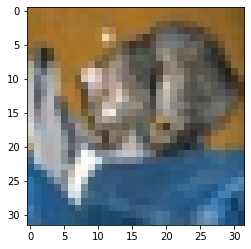

b'cat' , b'cat'


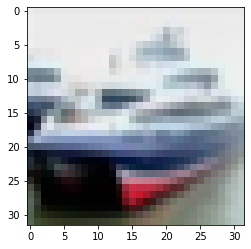

b'ship' , b'ship'


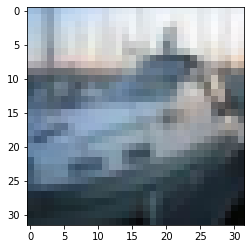

b'ship' , b'ship'


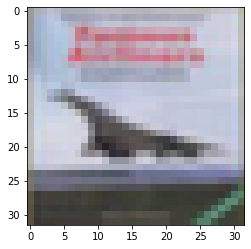

b'airplane' , b'airplane'


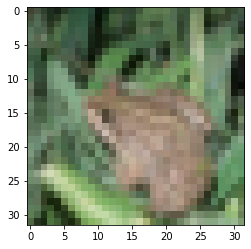

b'frog' , b'frog'


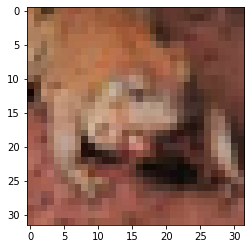

b'frog' , b'frog'


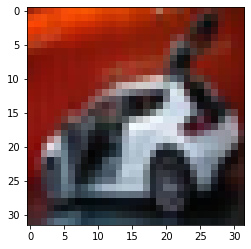

b'airplane' , b'automobile'


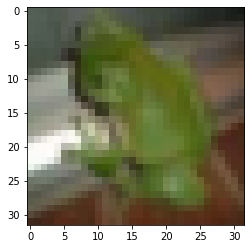

b'frog' , b'frog'


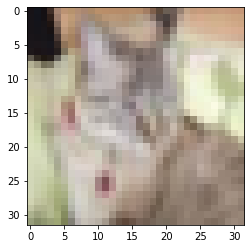

b'cat' , b'cat'


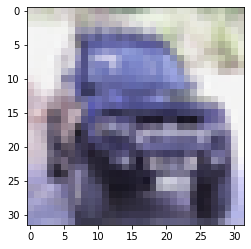

b'automobile' , b'automobile'


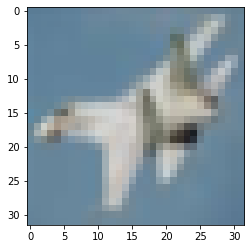

b'dog' , b'airplane'


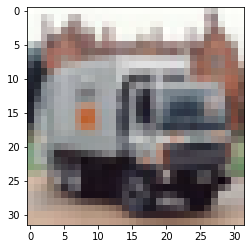

b'truck' , b'truck'


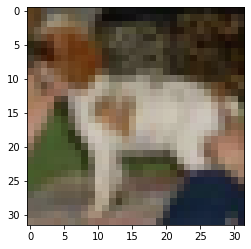

b'deer' , b'dog'


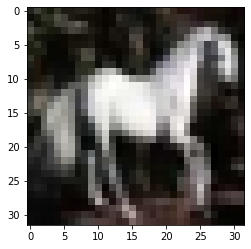

b'horse' , b'horse'


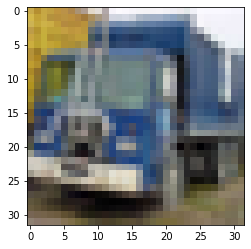

b'truck' , b'truck'


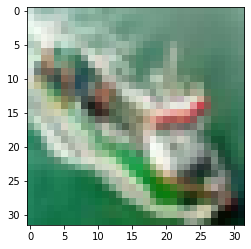

b'ship' , b'ship'


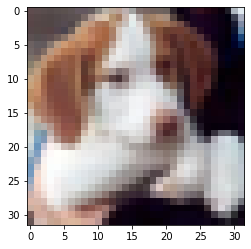

b'dog' , b'dog'


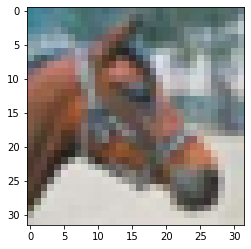

b'horse' , b'horse'


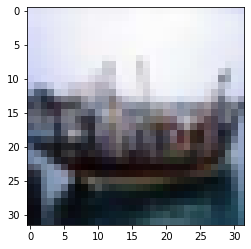

b'ship' , b'ship'


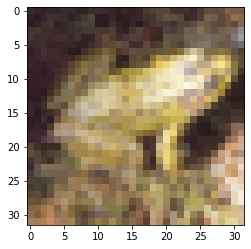

b'frog' , b'frog'


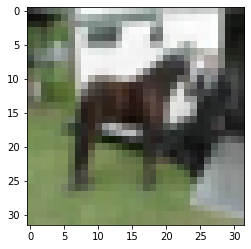

b'horse' , b'horse'


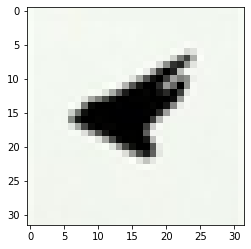

b'airplane' , b'airplane'


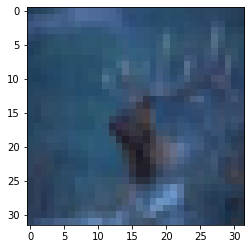

b'deer' , b'deer'


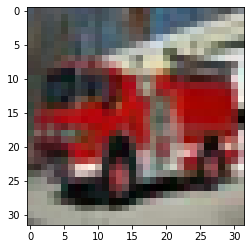

b'truck' , b'truck'


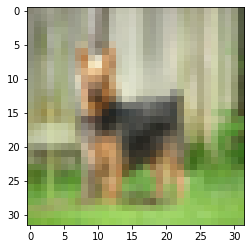

b'deer' , b'dog'


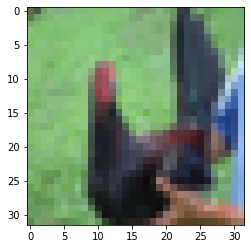

b'bird' , b'bird'


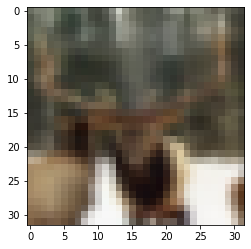

b'dog' , b'deer'


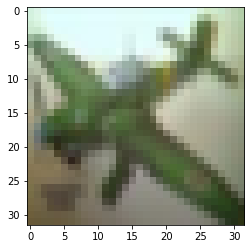

b'airplane' , b'airplane'


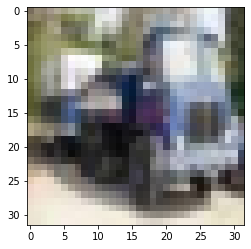

b'truck' , b'truck'


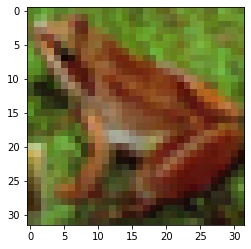

b'frog' , b'frog'


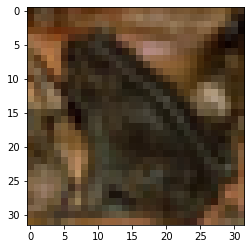

b'frog' , b'frog'


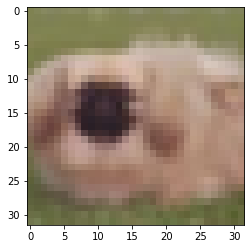

b'dog' , b'dog'


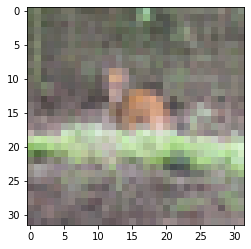

b'deer' , b'deer'


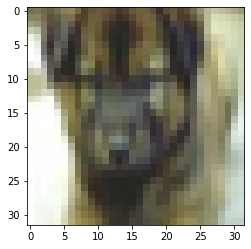

b'dog' , b'dog'


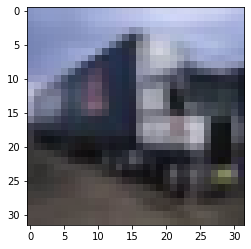

b'truck' , b'truck'


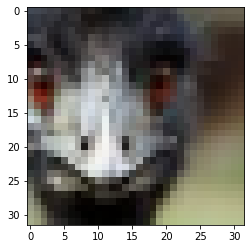

b'ship' , b'bird'


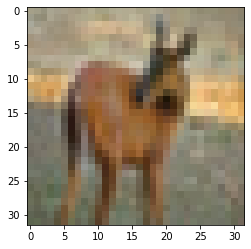

b'deer' , b'deer'


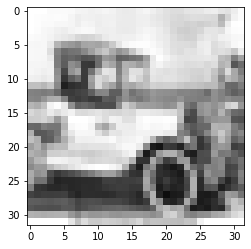

b'automobile' , b'automobile'


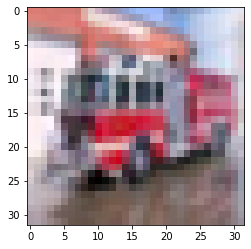

b'truck' , b'truck'


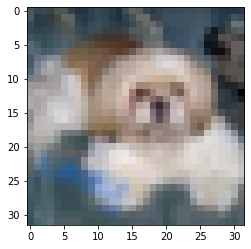

b'dog' , b'dog'


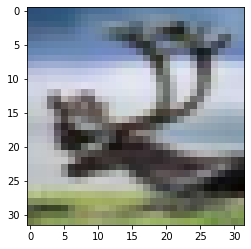

b'airplane' , b'deer'


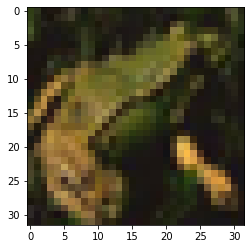

b'frog' , b'frog'


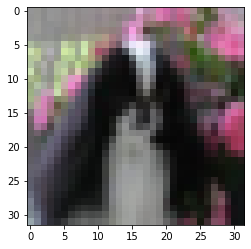

b'dog' , b'dog'


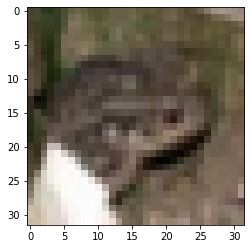

b'frog' , b'frog'


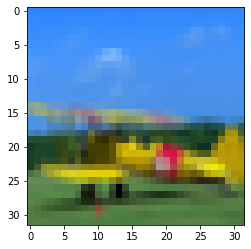

b'airplane' , b'airplane'


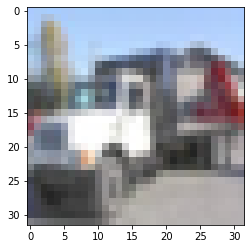

b'truck' , b'truck'


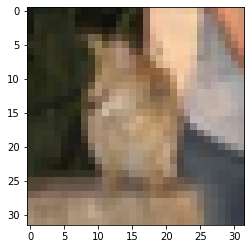

b'cat' , b'cat'


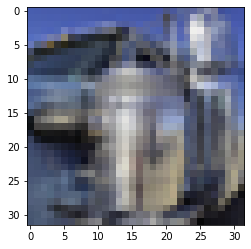

b'truck' , b'truck'


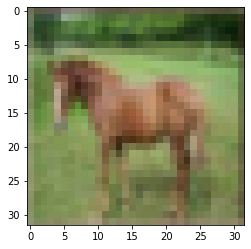

b'horse' , b'horse'


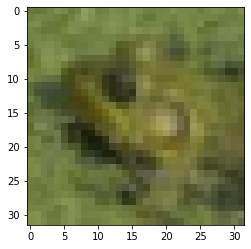

b'deer' , b'frog'


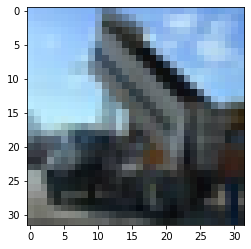

b'truck' , b'truck'


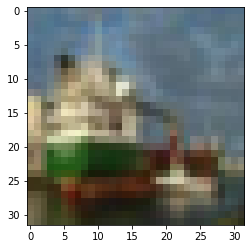

b'ship' , b'ship'


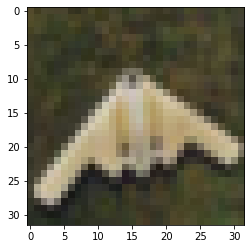

b'frog' , b'airplane'


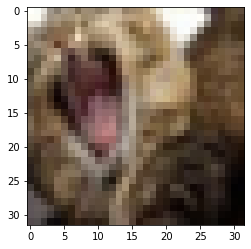

b'frog' , b'cat'


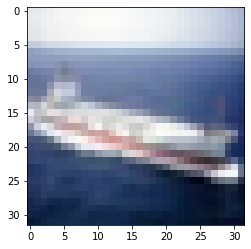

b'ship' , b'ship'


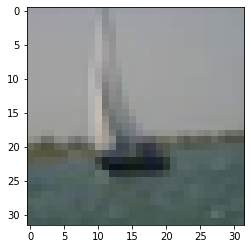

b'ship' , b'ship'


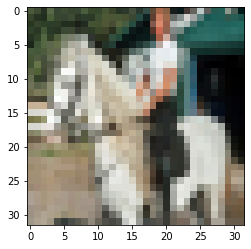

b'cat' , b'horse'


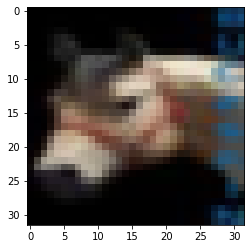

b'cat' , b'horse'


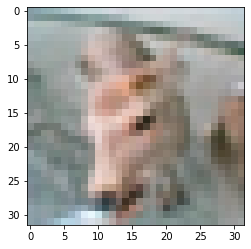

b'cat' , b'deer'


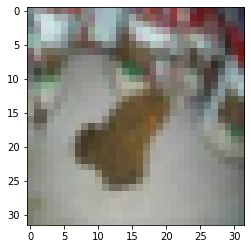

b'deer' , b'frog'


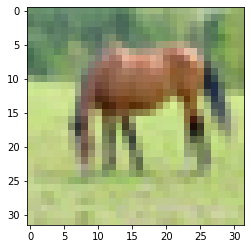

b'horse' , b'horse'


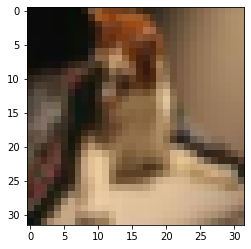

b'dog' , b'cat'


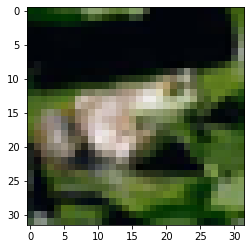

b'frog' , b'frog'


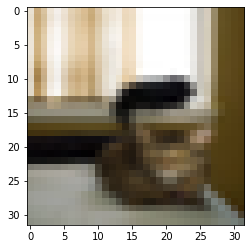

b'airplane' , b'cat'


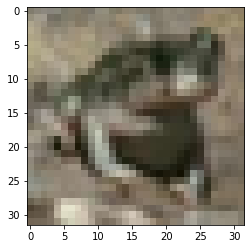

b'frog' , b'frog'


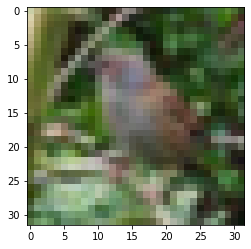

b'bird' , b'bird'


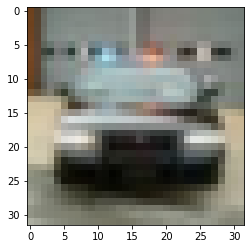

b'automobile' , b'automobile'


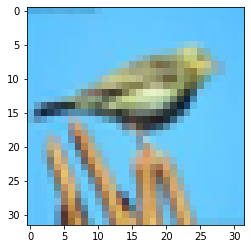

b'bird' , b'bird'


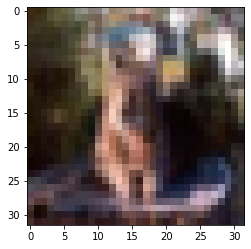

b'cat' , b'cat'


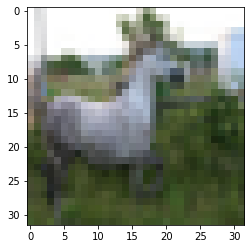

b'horse' , b'horse'


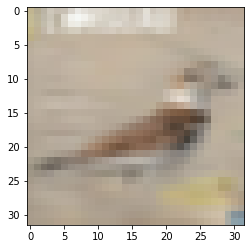

b'bird' , b'bird'


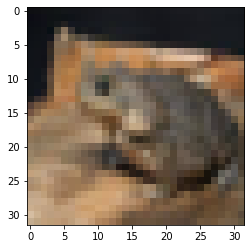

b'frog' , b'frog'


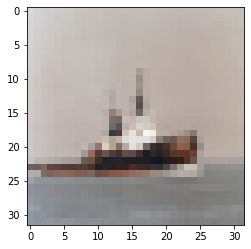

b'ship' , b'ship'


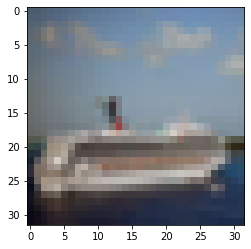

b'ship' , b'ship'


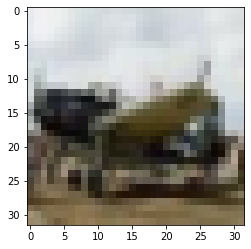

b'airplane' , b'airplane'


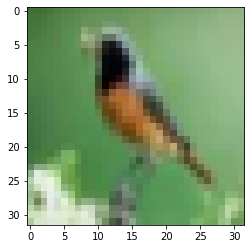

b'bird' , b'bird'


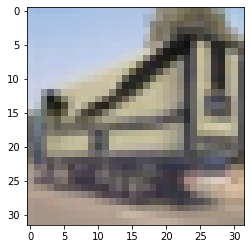

b'airplane' , b'truck'


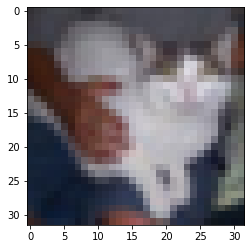

b'cat' , b'cat'


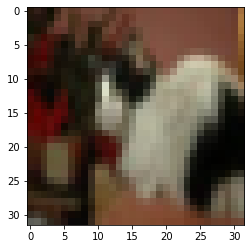

b'cat' , b'cat'


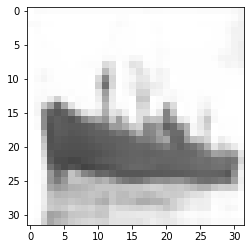

b'ship' , b'ship'


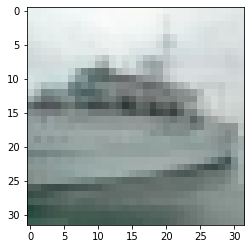

b'ship' , b'ship'


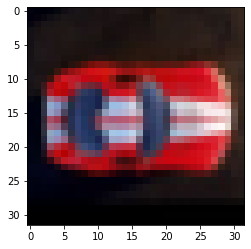

b'truck' , b'automobile'


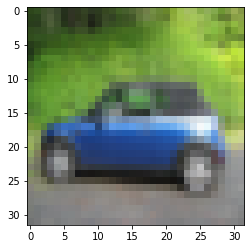

b'automobile' , b'automobile'


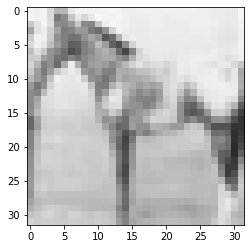

b'horse' , b'horse'


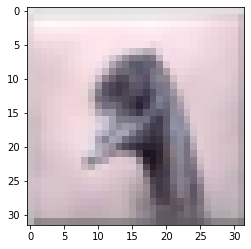

b'bird' , b'bird'


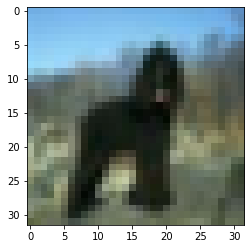

b'horse' , b'dog'


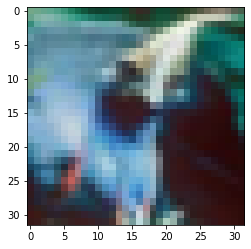

b'airplane' , b'bird'


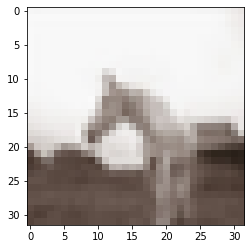

b'deer' , b'horse'


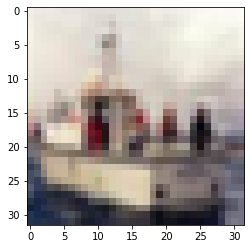

b'ship' , b'ship'


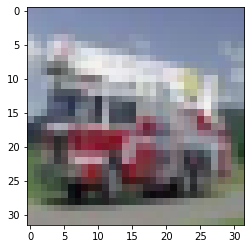

b'truck' , b'truck'


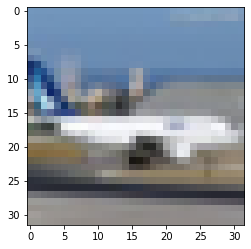

b'airplane' , b'airplane'


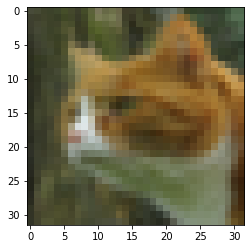

b'cat' , b'cat'


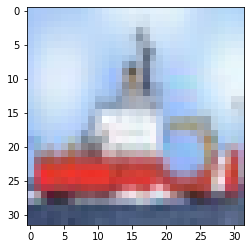

b'ship' , b'ship'


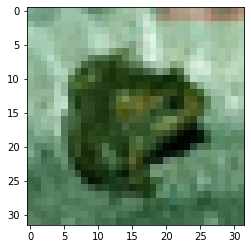

b'frog' , b'frog'


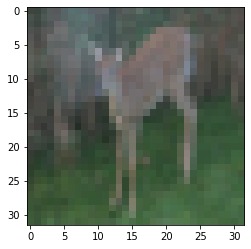

b'deer' , b'deer'


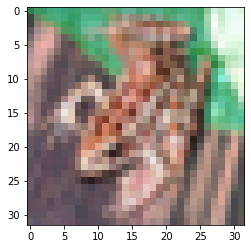

b'frog' , b'frog'


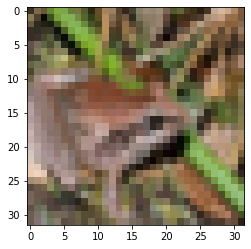

b'deer' , b'frog'


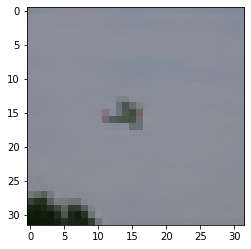

b'airplane' , b'airplane'


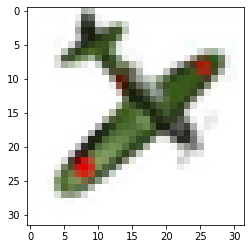

b'airplane' , b'airplane'


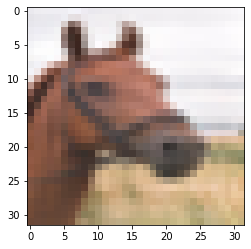

b'horse' , b'horse'


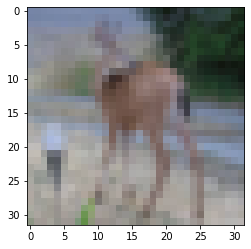

b'horse' , b'deer'


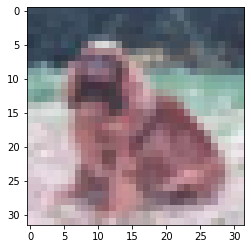

b'dog' , b'dog'


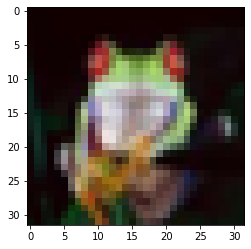

b'frog' , b'frog'


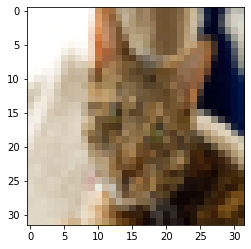

b'cat' , b'cat'


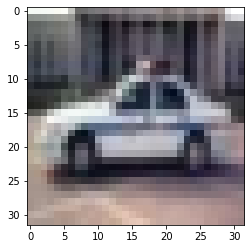

b'automobile' , b'automobile'


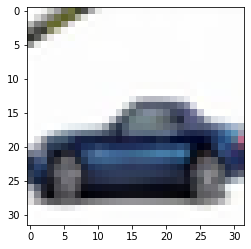

b'automobile' , b'automobile'


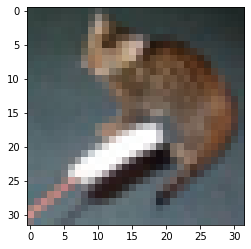

b'ship' , b'cat'


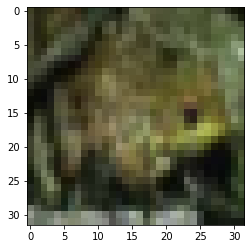

b'frog' , b'frog'


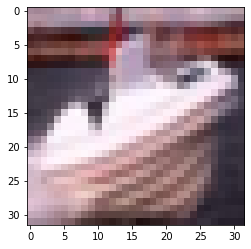

b'ship' , b'ship'


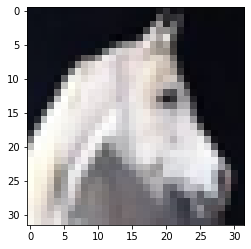

b'horse' , b'horse'


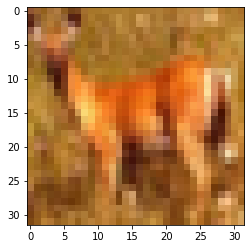

b'deer' , b'deer'


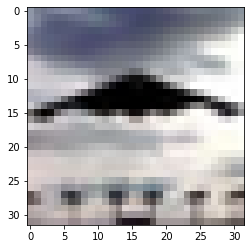

b'airplane' , b'airplane'


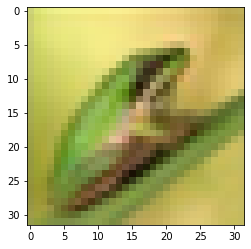

b'frog' , b'frog'


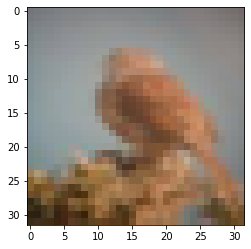

b'bird' , b'bird'


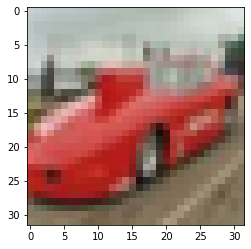

b'automobile' , b'automobile'


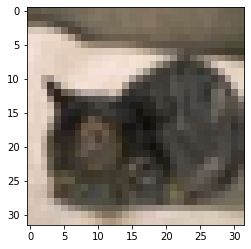

b'cat' , b'cat'


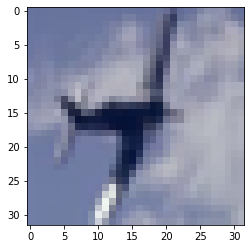

b'airplane' , b'airplane'


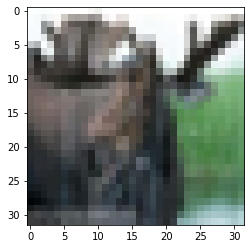

b'deer' , b'deer'


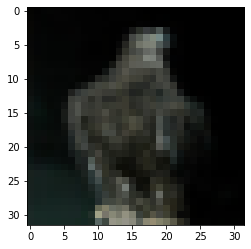

b'cat' , b'bird'


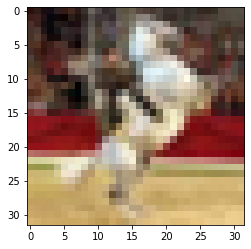

b'dog' , b'horse'


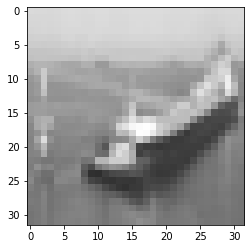

b'ship' , b'ship'


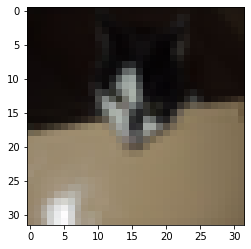

b'cat' , b'cat'


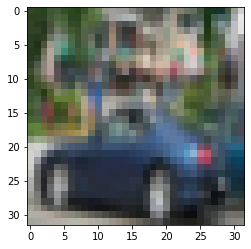

b'automobile' , b'automobile'


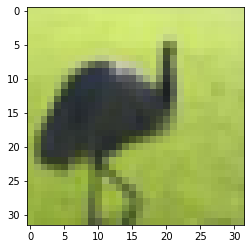

b'bird' , b'bird'


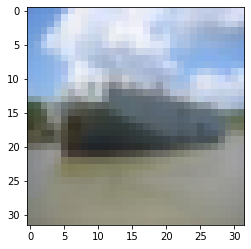

b'ship' , b'ship'


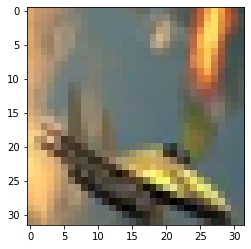

b'bird' , b'airplane'


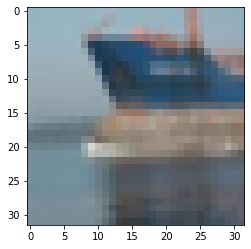

b'ship' , b'ship'


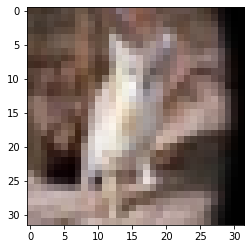

b'cat' , b'cat'


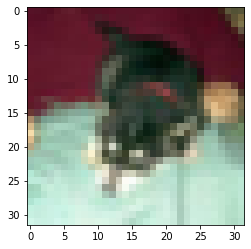

b'cat' , b'dog'


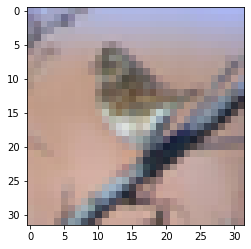

b'airplane' , b'bird'


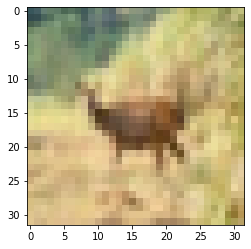

b'deer' , b'deer'


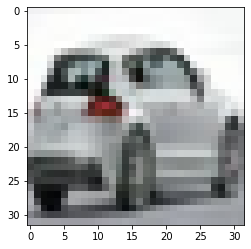

b'automobile' , b'automobile'


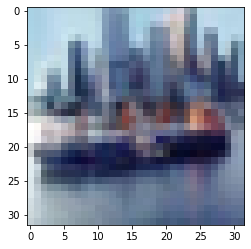

b'ship' , b'ship'


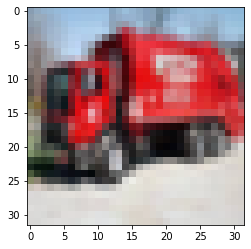

b'truck' , b'truck'


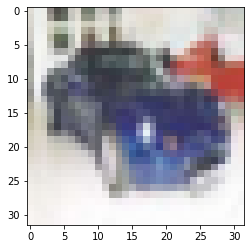

b'automobile' , b'automobile'


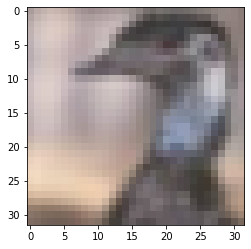

b'cat' , b'bird'


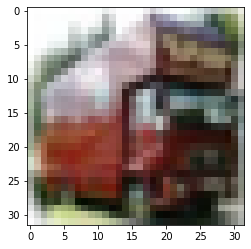

b'truck' , b'truck'


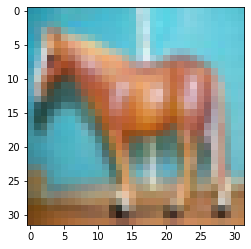

b'horse' , b'horse'


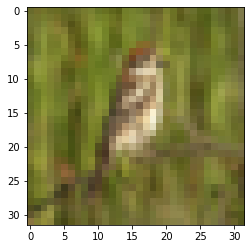

b'frog' , b'bird'


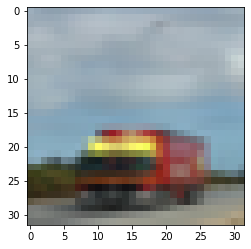

b'airplane' , b'truck'


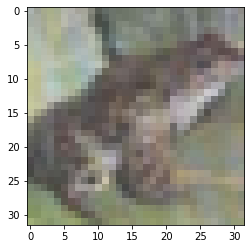

b'frog' , b'frog'


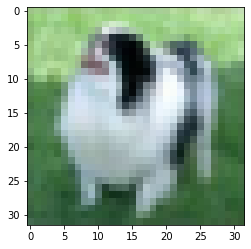

b'dog' , b'dog'


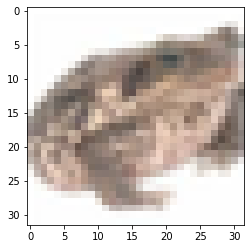

b'frog' , b'frog'


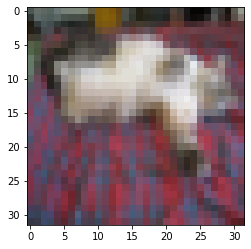

b'dog' , b'cat'


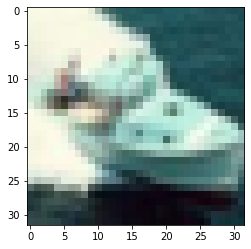

b'ship' , b'ship'


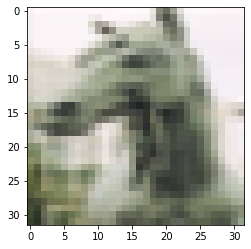

b'bird' , b'horse'


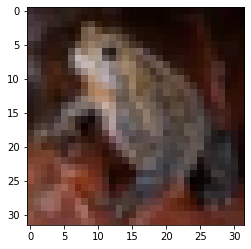

b'frog' , b'frog'


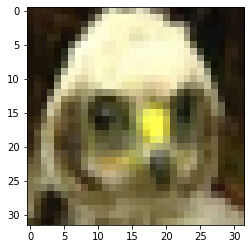

b'frog' , b'bird'


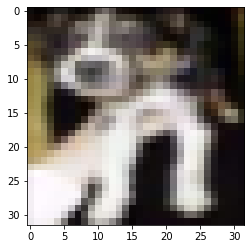

b'horse' , b'dog'


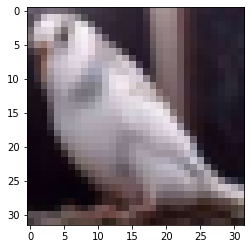

b'bird' , b'bird'


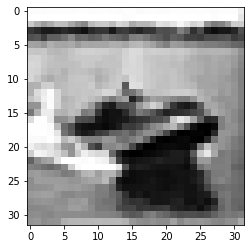

b'ship' , b'ship'


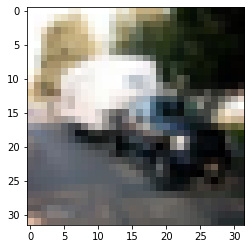

b'truck' , b'truck'


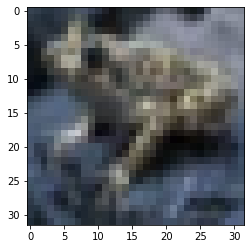

b'frog' , b'frog'


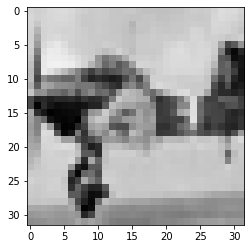

b'airplane' , b'airplane'


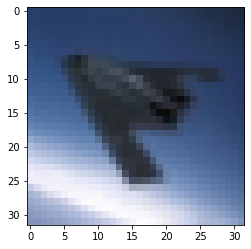

b'airplane' , b'airplane'


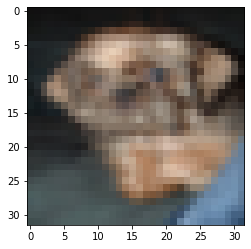

b'dog' , b'dog'


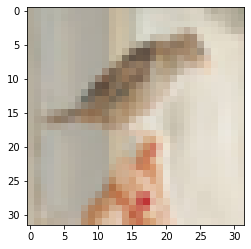

b'bird' , b'bird'


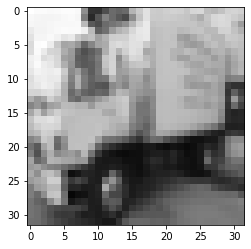

b'truck' , b'truck'


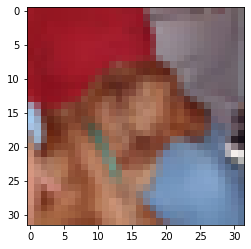

b'cat' , b'dog'


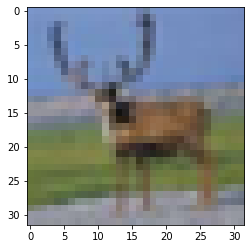

b'deer' , b'deer'


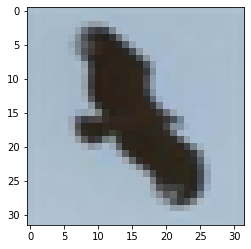

b'bird' , b'bird'


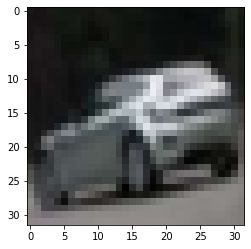

b'automobile' , b'automobile'


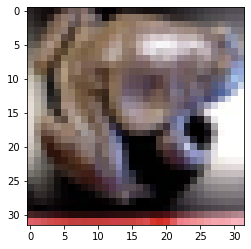

b'dog' , b'frog'


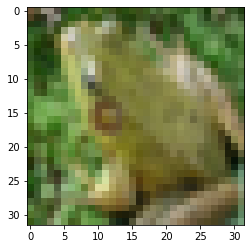

b'frog' , b'frog'


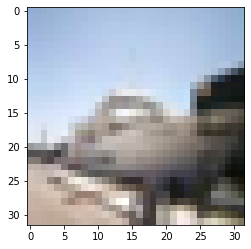

b'airplane' , b'ship'


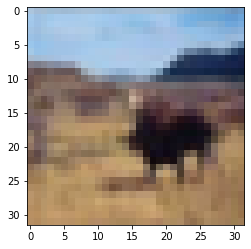

b'deer' , b'deer'


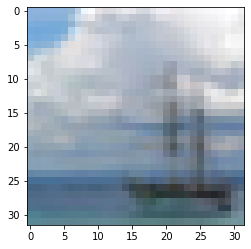

b'ship' , b'ship'


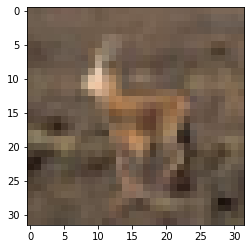

b'frog' , b'deer'


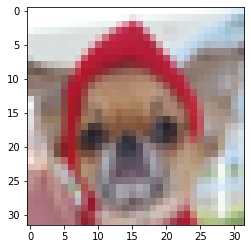

b'dog' , b'dog'


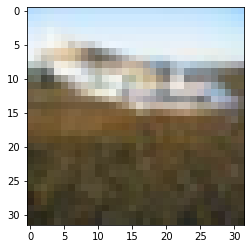

b'airplane' , b'airplane'


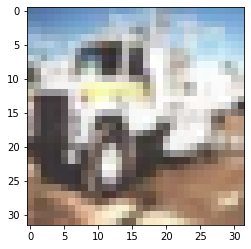

b'truck' , b'truck'


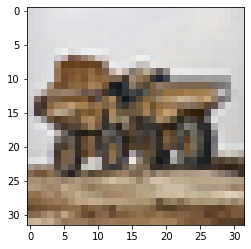

b'airplane' , b'truck'


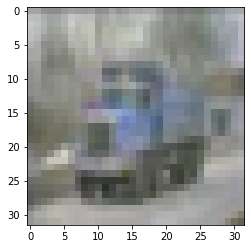

b'truck' , b'truck'


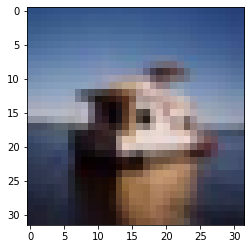

b'ship' , b'ship'


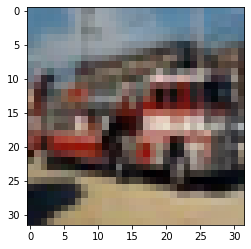

b'truck' , b'truck'


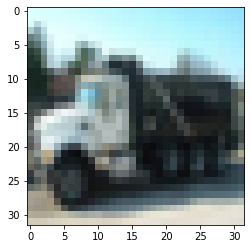

b'truck' , b'truck'


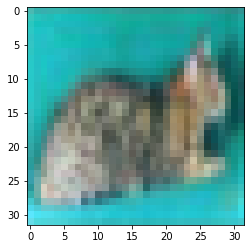

b'cat' , b'cat'


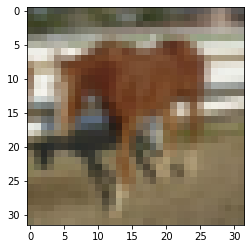

b'horse' , b'horse'


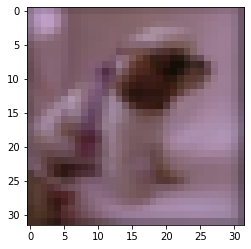

b'cat' , b'dog'


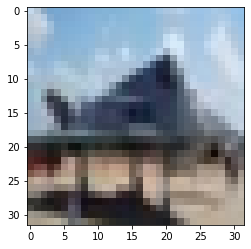

b'airplane' , b'airplane'


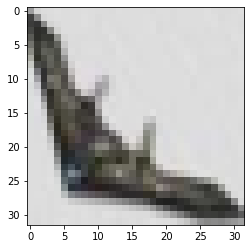

b'airplane' , b'airplane'


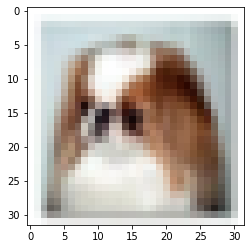

b'dog' , b'dog'


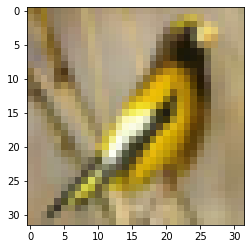

b'bird' , b'bird'


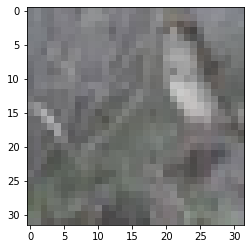

b'frog' , b'bird'


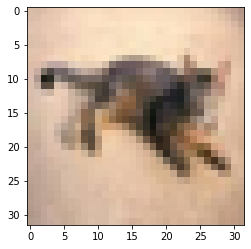

b'cat' , b'cat'


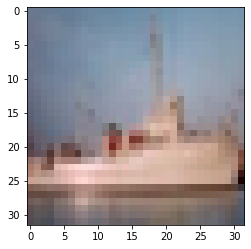

b'ship' , b'ship'


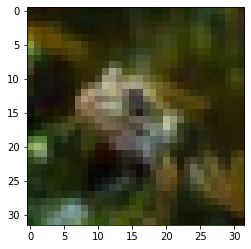

b'frog' , b'frog'


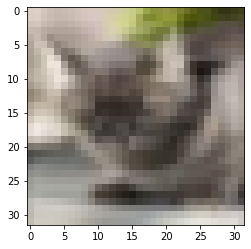

b'cat' , b'cat'


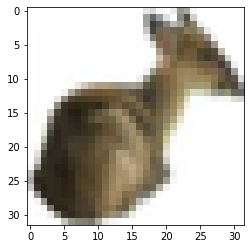

b'cat' , b'deer'


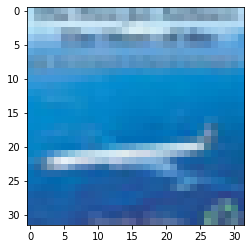

b'airplane' , b'airplane'


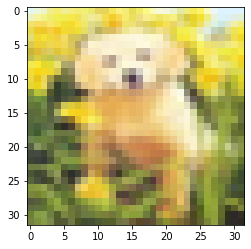

b'frog' , b'dog'


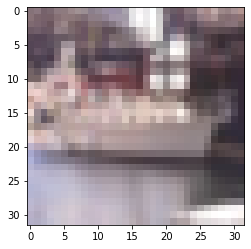

b'cat' , b'ship'


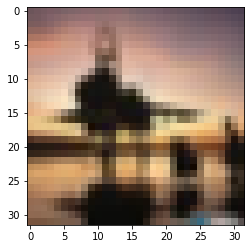

b'airplane' , b'airplane'


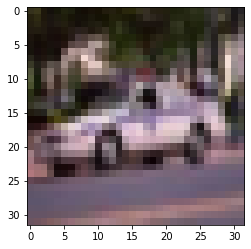

b'automobile' , b'automobile'


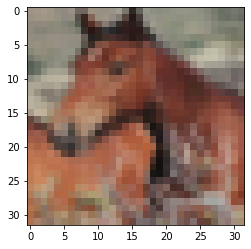

b'dog' , b'horse'


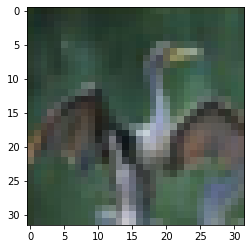

b'deer' , b'bird'


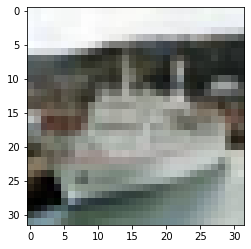

b'ship' , b'ship'


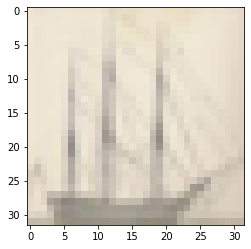

b'ship' , b'ship'


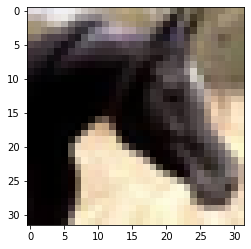

b'cat' , b'horse'


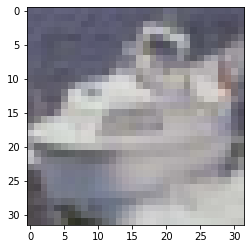

b'ship' , b'ship'


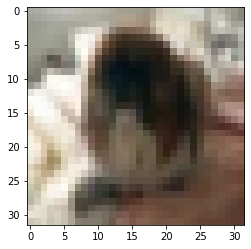

b'dog' , b'dog'


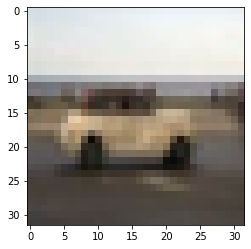

b'airplane' , b'automobile'


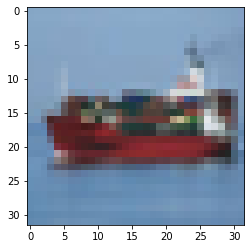

b'ship' , b'ship'


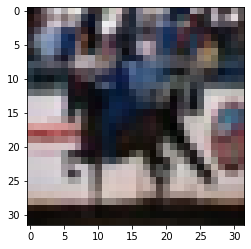

b'horse' , b'horse'


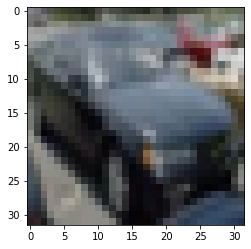

b'automobile' , b'automobile'


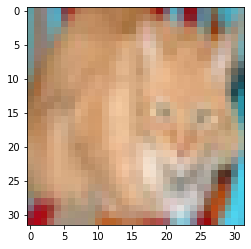

b'cat' , b'cat'


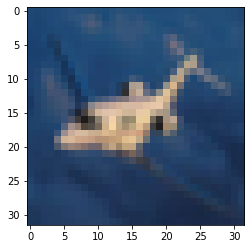

b'airplane' , b'airplane'


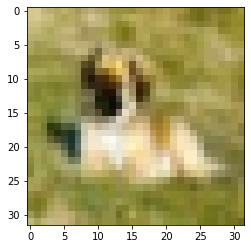

b'dog' , b'dog'


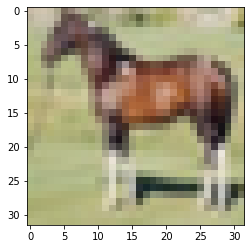

b'horse' , b'horse'


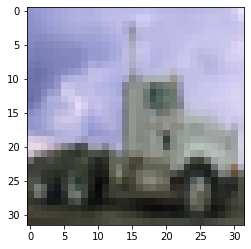

b'truck' , b'truck'


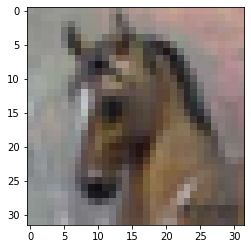

b'dog' , b'horse'


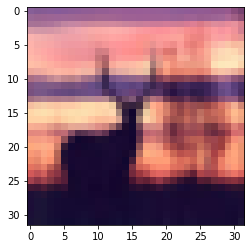

b'airplane' , b'deer'


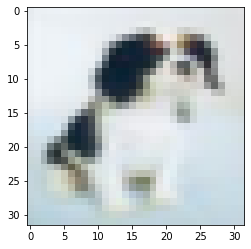

b'airplane' , b'dog'


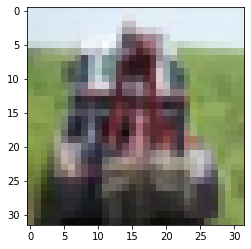

b'truck' , b'truck'


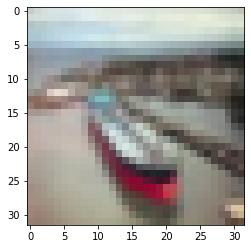

b'ship' , b'ship'


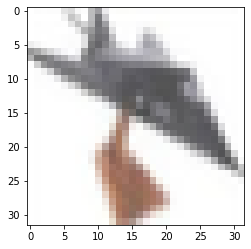

b'airplane' , b'airplane'


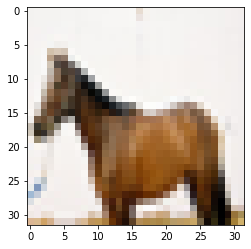

b'horse' , b'horse'


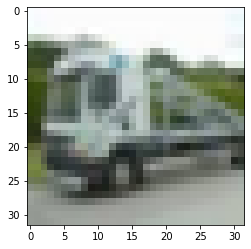

b'truck' , b'truck'


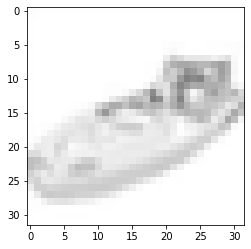

b'airplane' , b'ship'


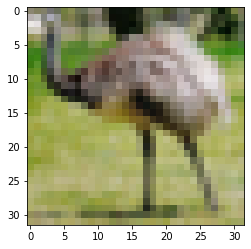

b'bird' , b'bird'


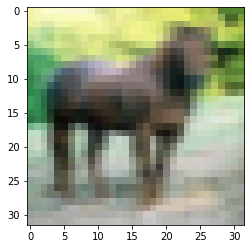

b'horse' , b'horse'


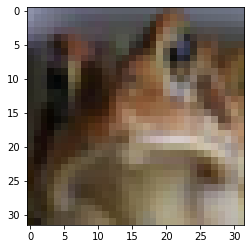

b'cat' , b'frog'


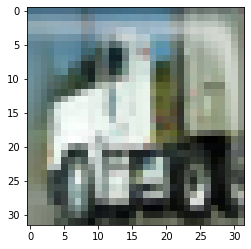

b'truck' , b'truck'


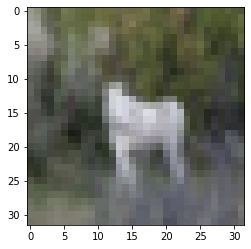

b'dog' , b'deer'


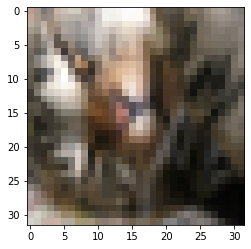

b'deer' , b'cat'


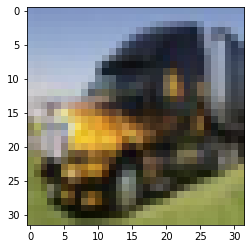

b'truck' , b'truck'


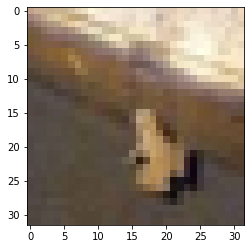

b'deer' , b'frog'


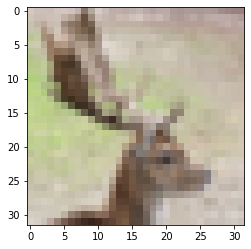

b'deer' , b'deer'


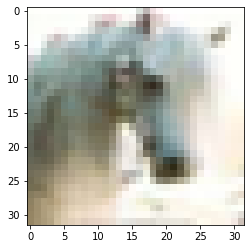

b'cat' , b'horse'


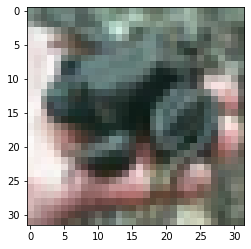

b'frog' , b'frog'


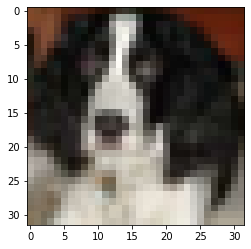

b'dog' , b'dog'


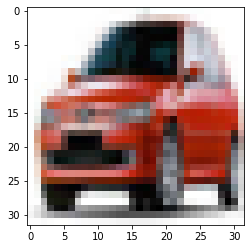

b'automobile' , b'automobile'


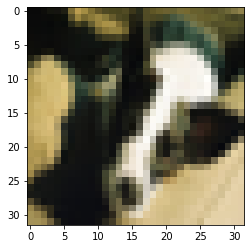

b'dog' , b'dog'


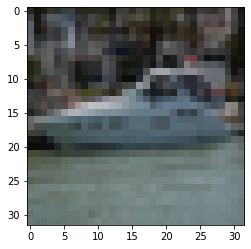

b'automobile' , b'ship'


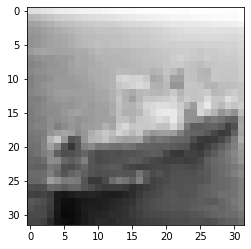

b'ship' , b'ship'


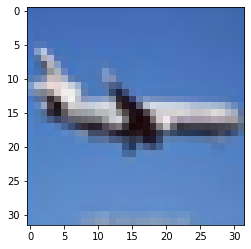

b'airplane' , b'airplane'


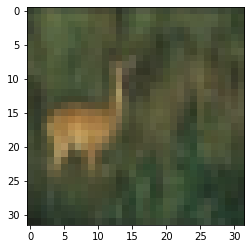

b'deer' , b'deer'


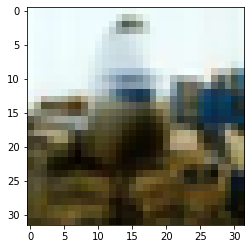

b'truck' , b'airplane'


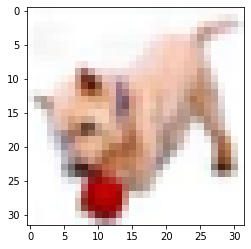

b'dog' , b'dog'


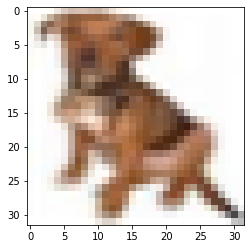

b'cat' , b'dog'


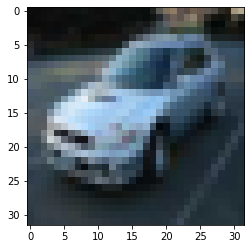

b'automobile' , b'automobile'


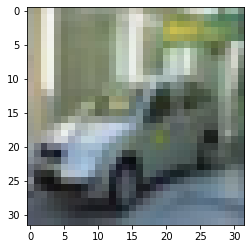

b'automobile' , b'automobile'


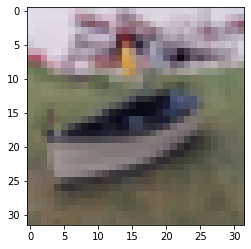

b'ship' , b'ship'


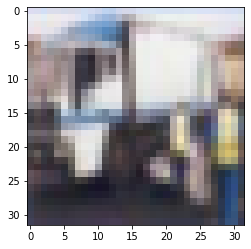

b'truck' , b'truck'


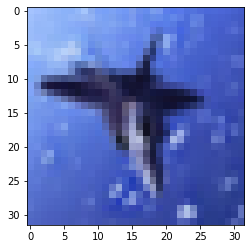

b'airplane' , b'airplane'


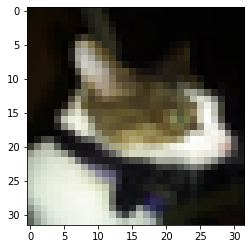

b'bird' , b'cat'


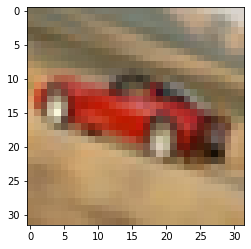

b'automobile' , b'automobile'


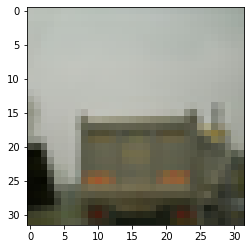

b'ship' , b'truck'


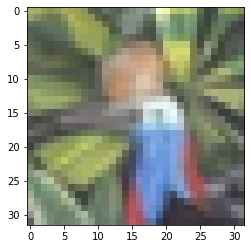

b'bird' , b'bird'


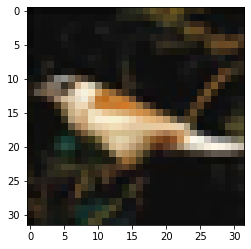

b'bird' , b'bird'


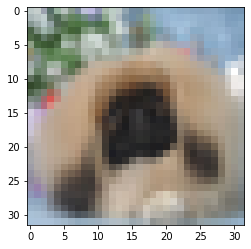

b'dog' , b'dog'


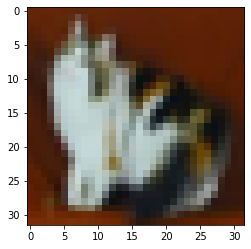

b'cat' , b'cat'


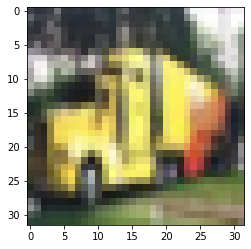

b'truck' , b'truck'


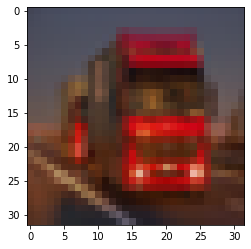

b'truck' , b'truck'


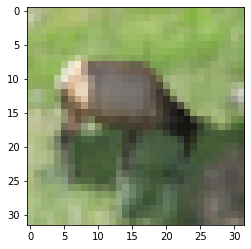

b'bird' , b'deer'


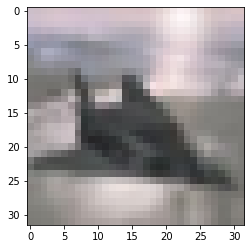

b'airplane' , b'airplane'


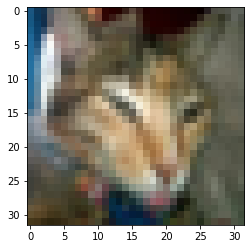

b'frog' , b'cat'


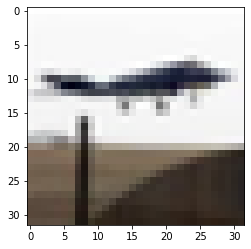

b'airplane' , b'airplane'


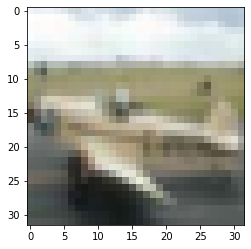

b'ship' , b'airplane'


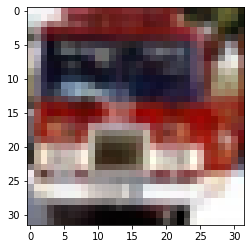

b'truck' , b'truck'


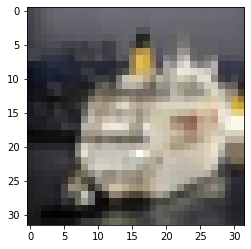

b'ship' , b'ship'


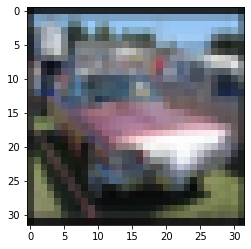

b'automobile' , b'automobile'


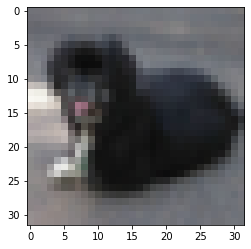

b'cat' , b'dog'


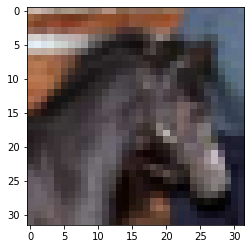

b'frog' , b'horse'


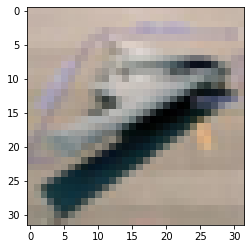

b'ship' , b'airplane'


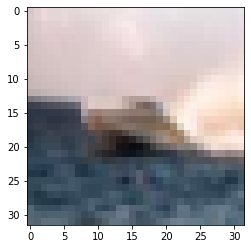

b'ship' , b'ship'


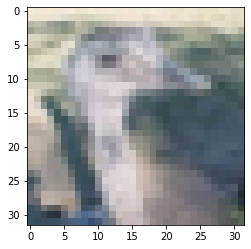

b'bird' , b'bird'


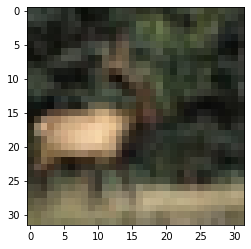

b'deer' , b'deer'


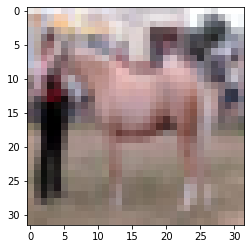

b'horse' , b'horse'


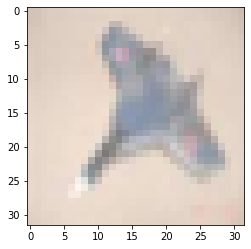

b'airplane' , b'airplane'


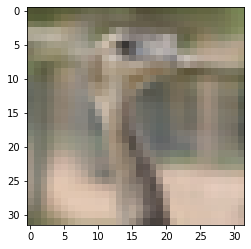

b'bird' , b'bird'


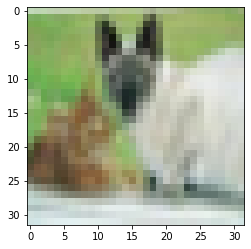

b'cat' , b'cat'


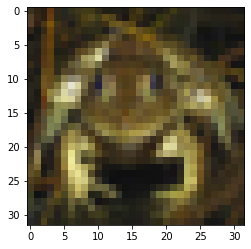

b'frog' , b'frog'


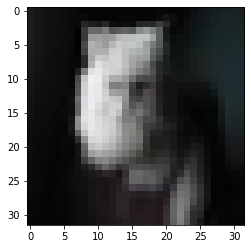

b'cat' , b'cat'


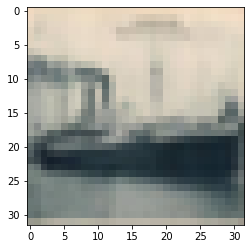

b'ship' , b'ship'


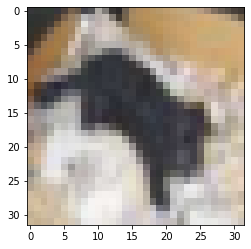

b'bird' , b'dog'


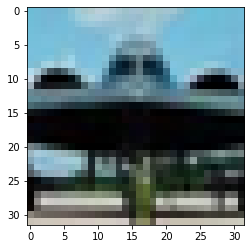

b'airplane' , b'airplane'


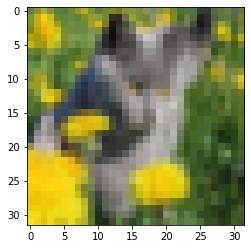

b'deer' , b'cat'


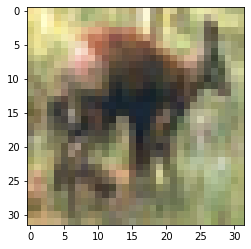

b'deer' , b'deer'


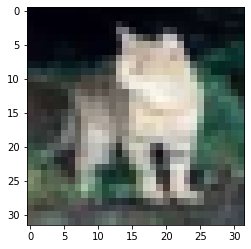

b'dog' , b'cat'


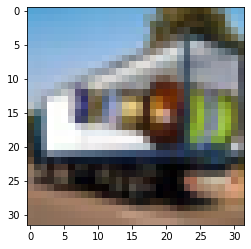

b'truck' , b'truck'


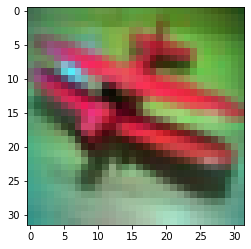

b'airplane' , b'airplane'


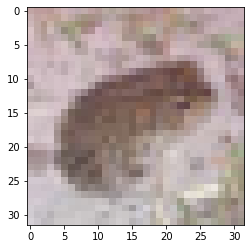

b'frog' , b'frog'


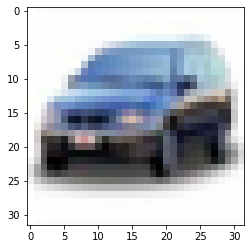

b'automobile' , b'automobile'


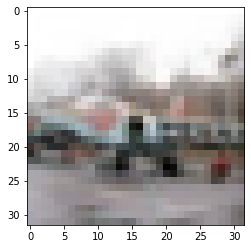

b'truck' , b'airplane'


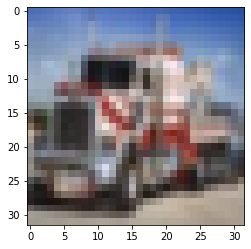

b'truck' , b'truck'


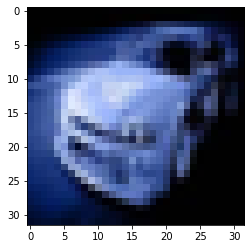

b'automobile' , b'automobile'


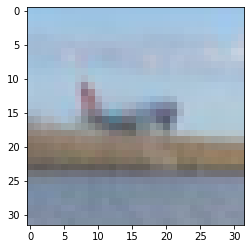

b'ship' , b'airplane'


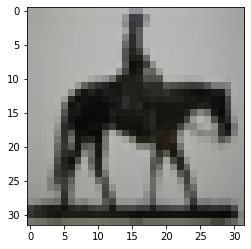

b'horse' , b'horse'


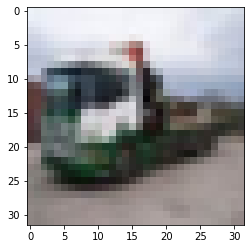

b'truck' , b'truck'


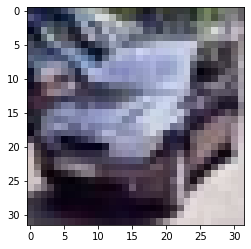

b'automobile' , b'automobile'


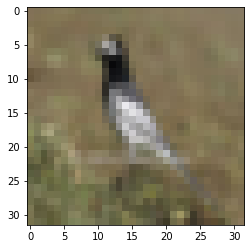

b'bird' , b'bird'


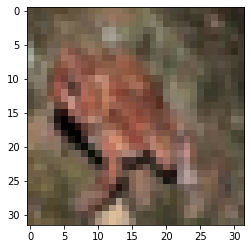

b'frog' , b'frog'


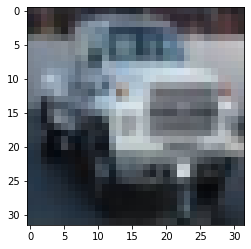

b'truck' , b'truck'


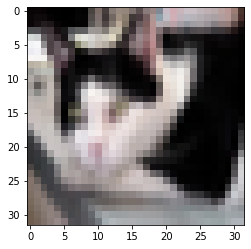

b'dog' , b'cat'


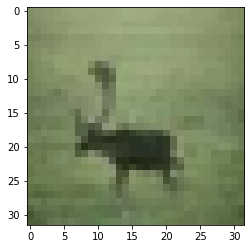

b'deer' , b'deer'


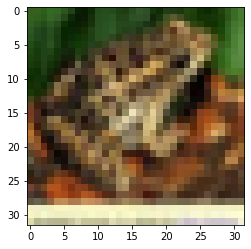

b'frog' , b'frog'


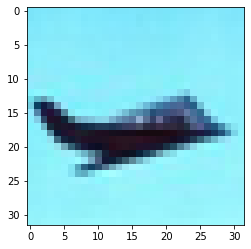

b'airplane' , b'airplane'


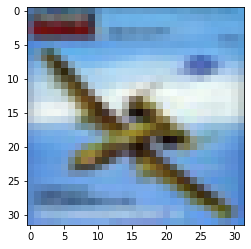

b'airplane' , b'airplane'


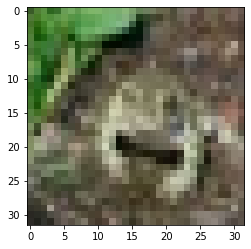

b'frog' , b'frog'


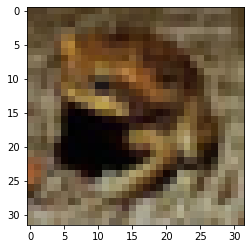

b'frog' , b'frog'


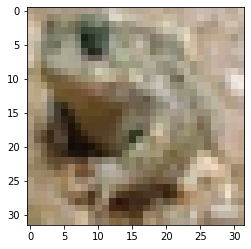

b'frog' , b'frog'


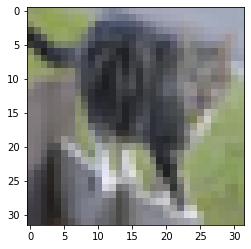

b'dog' , b'cat'


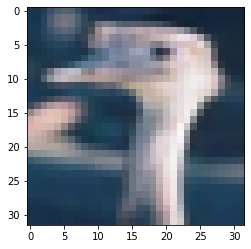

b'cat' , b'bird'


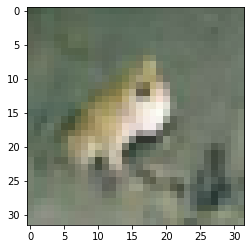

b'frog' , b'frog'


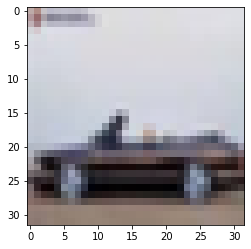

b'automobile' , b'automobile'


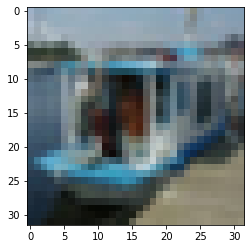

b'truck' , b'ship'


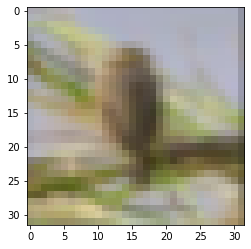

b'bird' , b'bird'


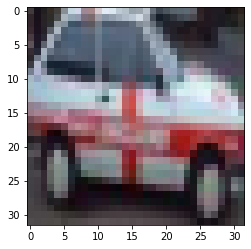

b'automobile' , b'automobile'


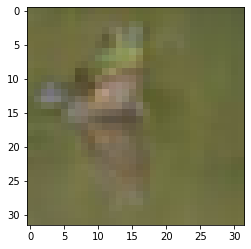

b'deer' , b'frog'


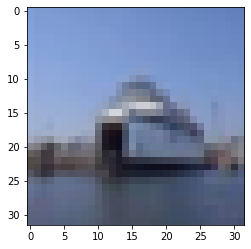

b'automobile' , b'ship'


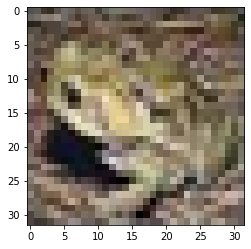

b'frog' , b'frog'


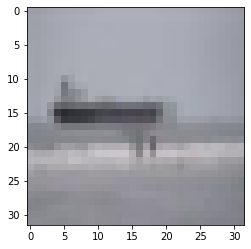

b'airplane' , b'ship'


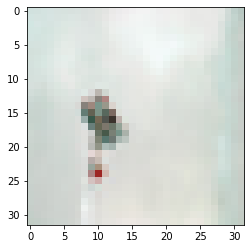

b'airplane' , b'airplane'


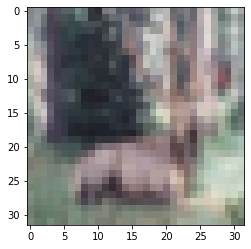

b'dog' , b'deer'


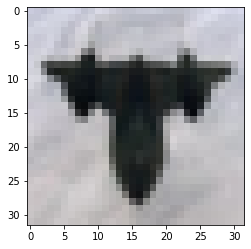

b'airplane' , b'airplane'


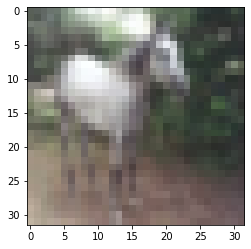

b'horse' , b'horse'


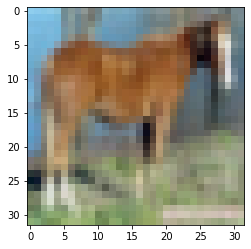

b'horse' , b'horse'


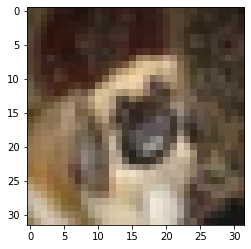

b'dog' , b'dog'


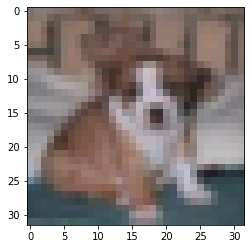

b'dog' , b'dog'


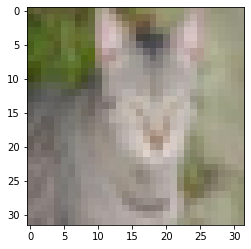

b'cat' , b'cat'


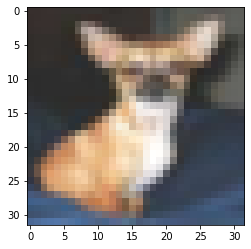

b'dog' , b'dog'


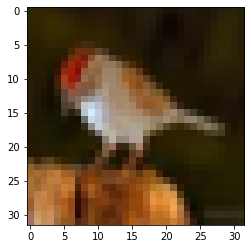

b'bird' , b'bird'


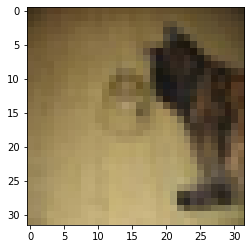

b'bird' , b'cat'


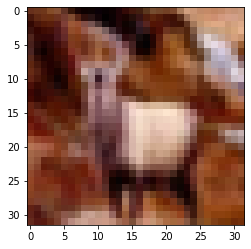

b'horse' , b'deer'


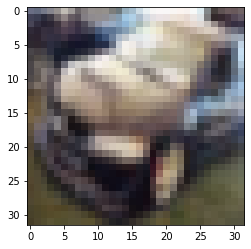

b'horse' , b'automobile'


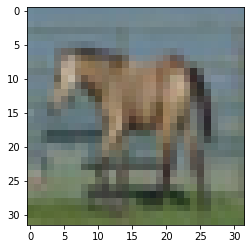

b'horse' , b'horse'


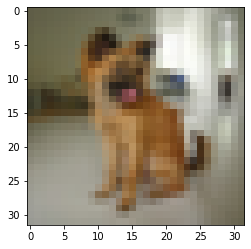

b'dog' , b'dog'


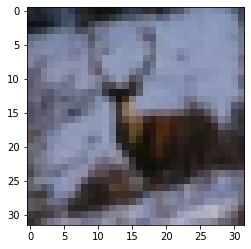

b'deer' , b'deer'


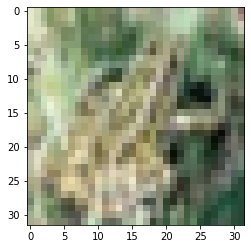

b'frog' , b'frog'


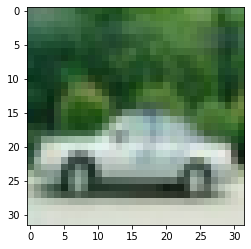

b'automobile' , b'automobile'


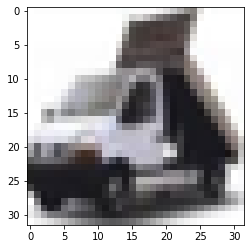

b'truck' , b'truck'


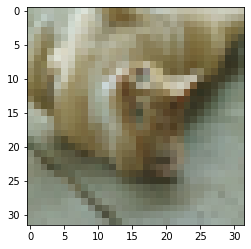

b'frog' , b'cat'


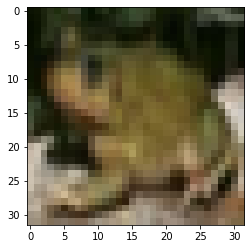

b'frog' , b'frog'


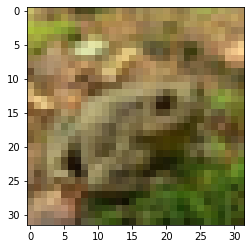

b'frog' , b'frog'


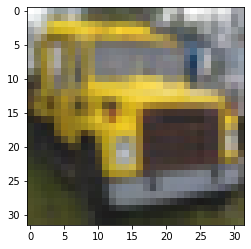

b'truck' , b'truck'


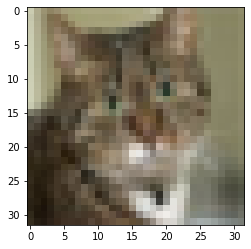

b'cat' , b'cat'


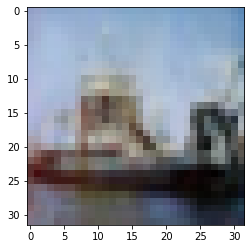

b'ship' , b'ship'


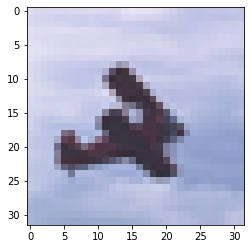

b'airplane' , b'airplane'


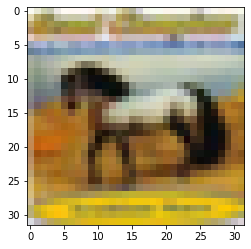

b'horse' , b'horse'


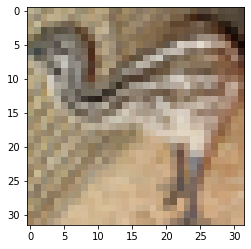

b'frog' , b'bird'


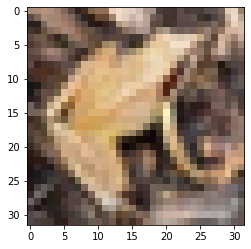

b'frog' , b'frog'


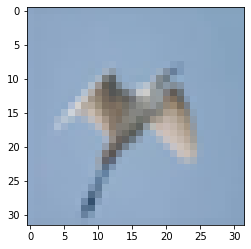

b'bird' , b'bird'


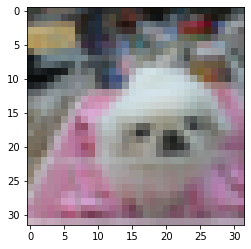

b'horse' , b'dog'


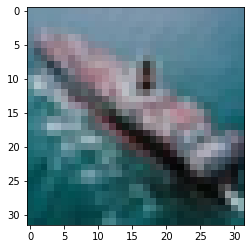

b'ship' , b'ship'


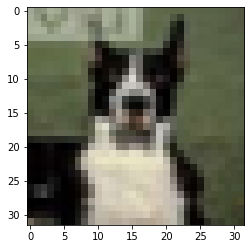

b'dog' , b'dog'


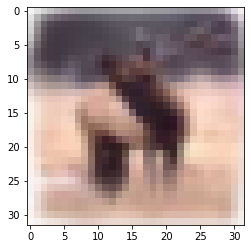

b'deer' , b'deer'


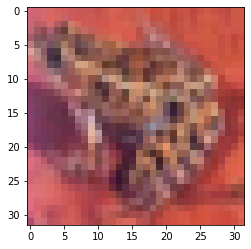

b'frog' , b'frog'


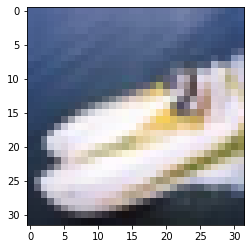

b'ship' , b'ship'


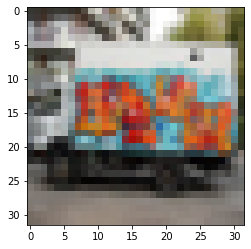

b'truck' , b'truck'


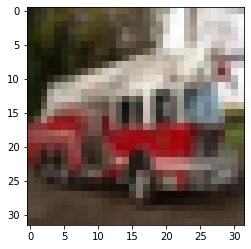

b'truck' , b'truck'


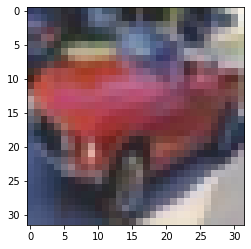

b'automobile' , b'automobile'


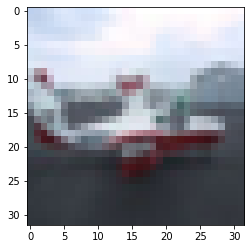

b'ship' , b'airplane'


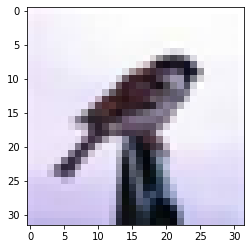

b'bird' , b'bird'


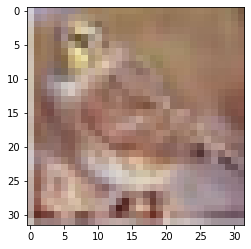

b'cat' , b'bird'


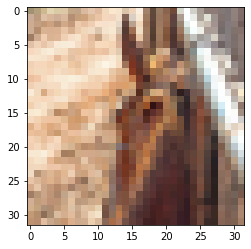

b'horse' , b'horse'


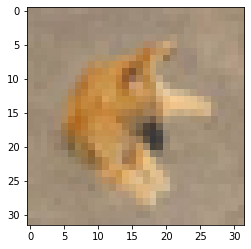

b'frog' , b'cat'


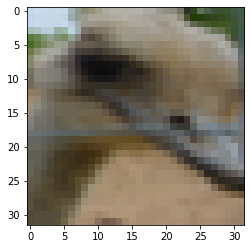

b'bird' , b'bird'


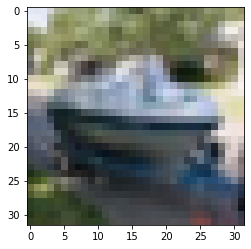

b'ship' , b'ship'


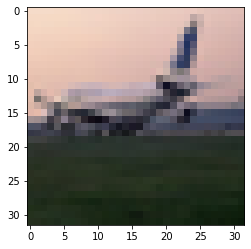

b'airplane' , b'airplane'


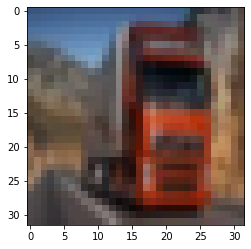

b'truck' , b'truck'


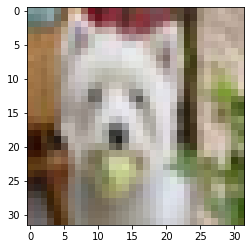

b'dog' , b'dog'


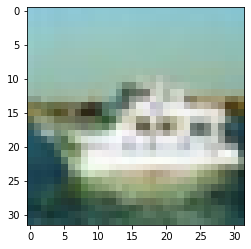

b'ship' , b'ship'


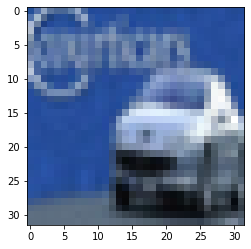

b'airplane' , b'automobile'


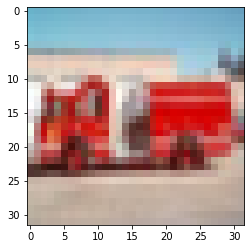

b'truck' , b'truck'


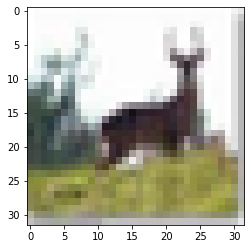

b'deer' , b'deer'


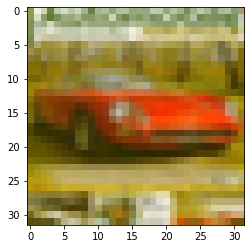

b'airplane' , b'automobile'


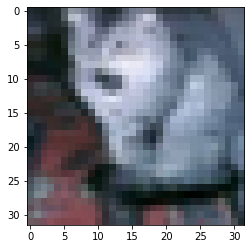

b'dog' , b'cat'


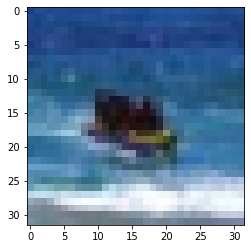

b'airplane' , b'ship'


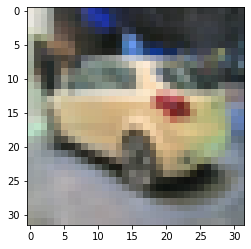

b'automobile' , b'automobile'


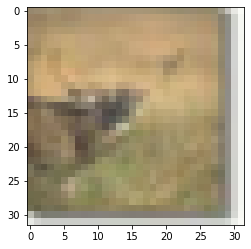

b'bird' , b'deer'


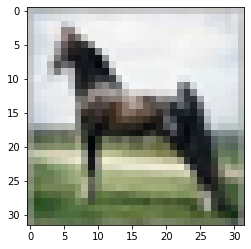

b'horse' , b'horse'


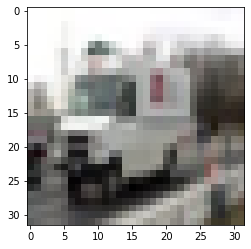

b'truck' , b'truck'


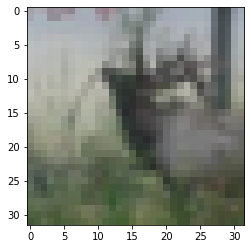

b'deer' , b'deer'


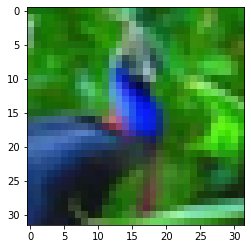

b'bird' , b'bird'


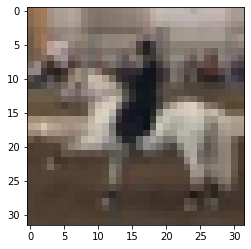

b'horse' , b'horse'


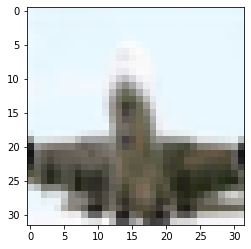

b'cat' , b'airplane'


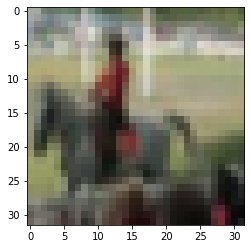

b'horse' , b'horse'


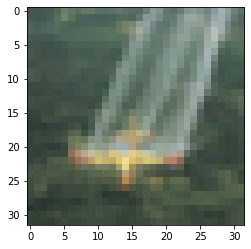

b'ship' , b'airplane'


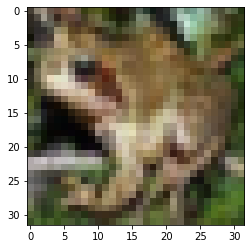

b'frog' , b'frog'


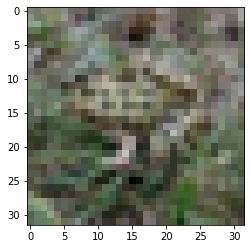

b'frog' , b'frog'


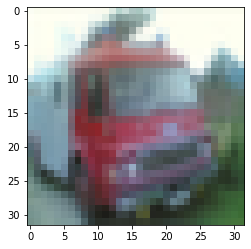

b'truck' , b'truck'


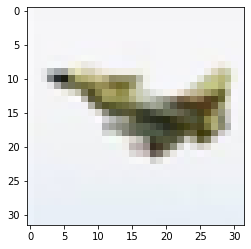

b'airplane' , b'airplane'


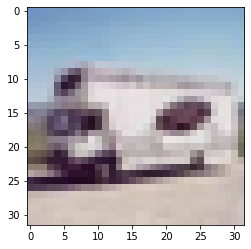

b'airplane' , b'truck'


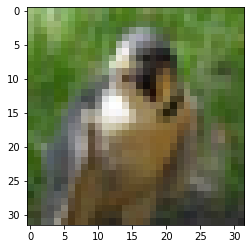

b'dog' , b'bird'


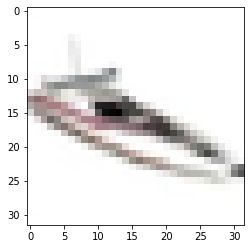

b'airplane' , b'ship'


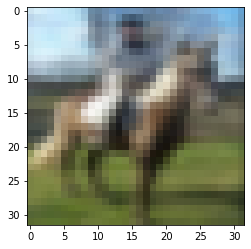

b'horse' , b'horse'


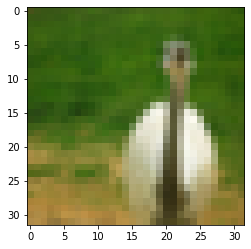

b'horse' , b'bird'


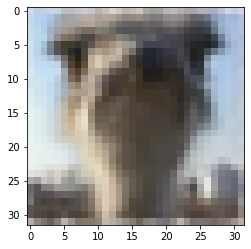

b'cat' , b'bird'


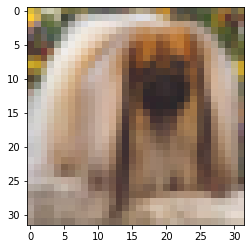

b'dog' , b'dog'


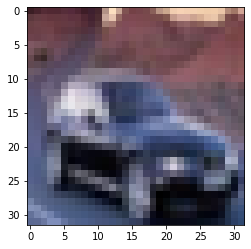

b'automobile' , b'automobile'


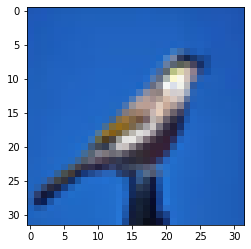

b'bird' , b'bird'


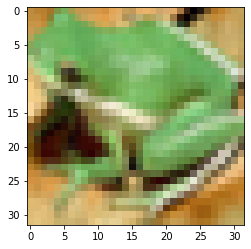

b'automobile' , b'frog'


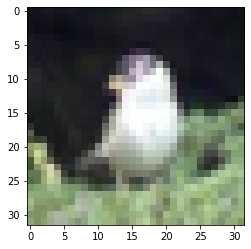

b'horse' , b'bird'


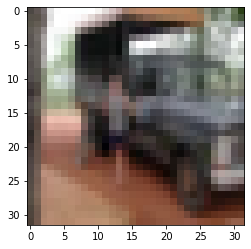

b'truck' , b'truck'


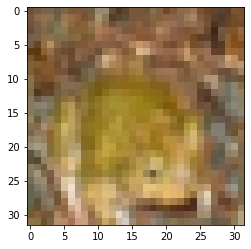

b'frog' , b'frog'


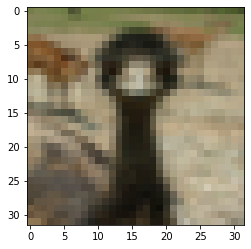

b'cat' , b'bird'


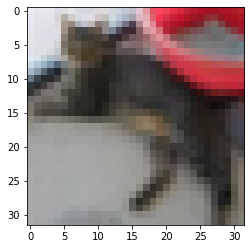

b'cat' , b'cat'


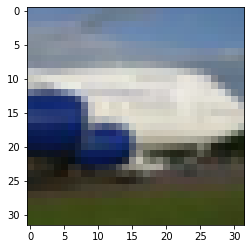

b'airplane' , b'airplane'


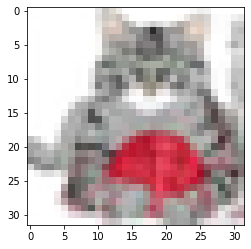

b'automobile' , b'cat'


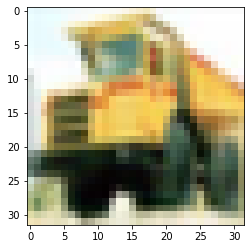

b'truck' , b'truck'


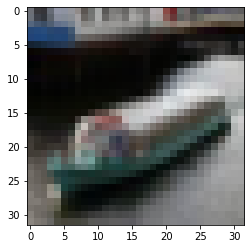

b'ship' , b'ship'


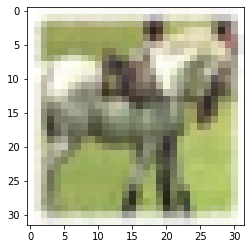

b'horse' , b'horse'


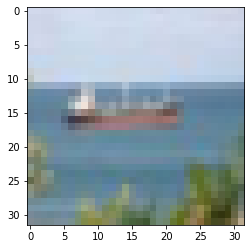

b'ship' , b'ship'


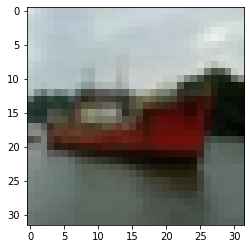

b'ship' , b'ship'


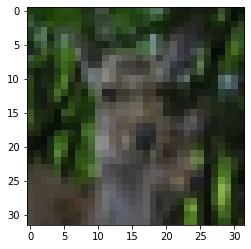

b'deer' , b'deer'


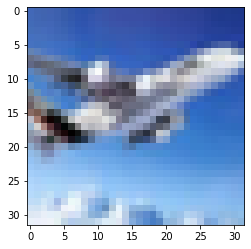

b'airplane' , b'airplane'


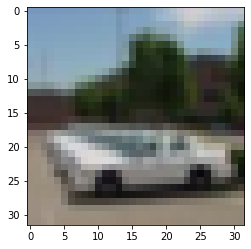

b'automobile' , b'automobile'


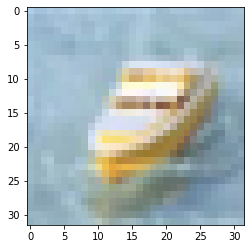

b'ship' , b'ship'


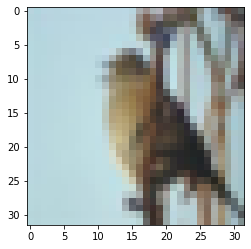

b'cat' , b'bird'


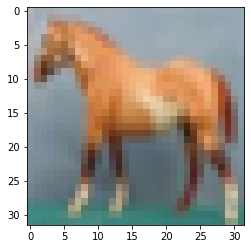

b'horse' , b'horse'


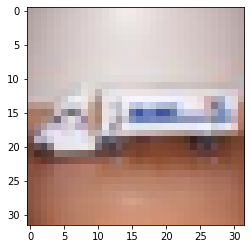

b'ship' , b'truck'


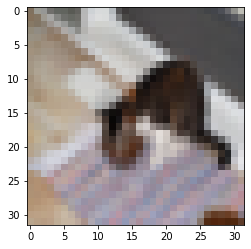

b'cat' , b'cat'


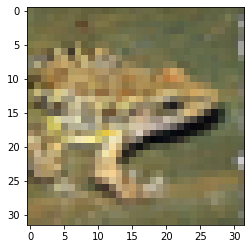

b'frog' , b'frog'


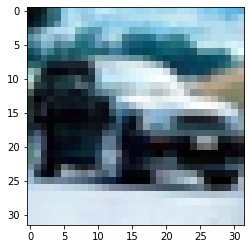

b'automobile' , b'automobile'


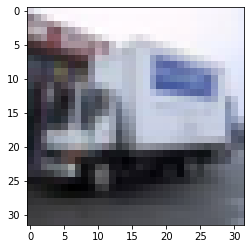

b'truck' , b'truck'


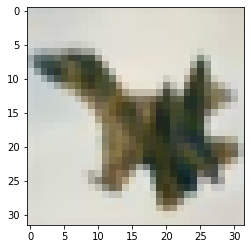

b'cat' , b'airplane'


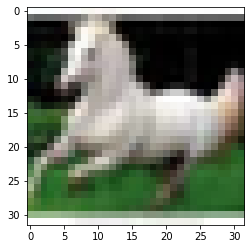

b'horse' , b'horse'


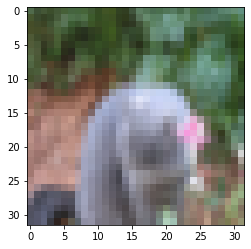

b'bird' , b'cat'


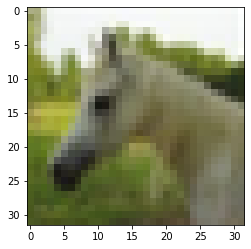

b'horse' , b'horse'


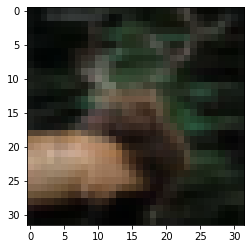

b'deer' , b'deer'


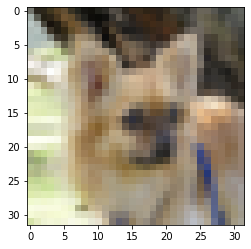

b'cat' , b'dog'


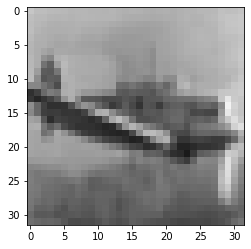

b'ship' , b'airplane'


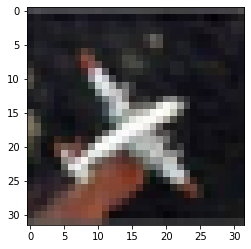

b'airplane' , b'airplane'


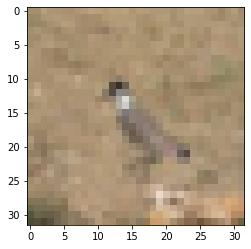

b'bird' , b'bird'


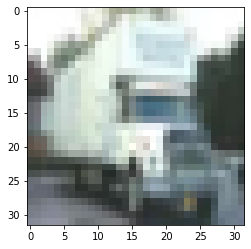

b'truck' , b'truck'


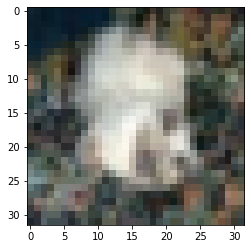

b'cat' , b'cat'


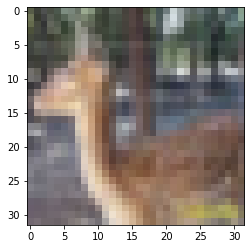

b'deer' , b'deer'


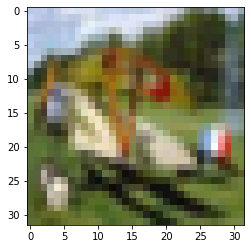

b'truck' , b'airplane'


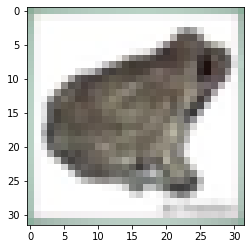

b'frog' , b'frog'


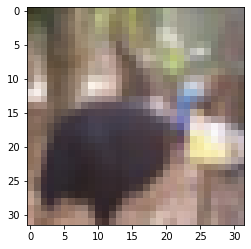

b'bird' , b'bird'


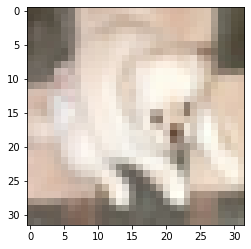

b'dog' , b'dog'


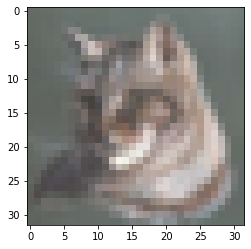

b'cat' , b'cat'


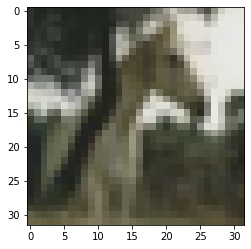

b'deer' , b'horse'


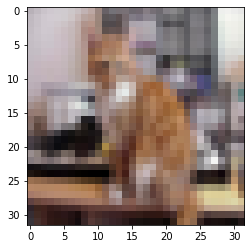

b'cat' , b'cat'


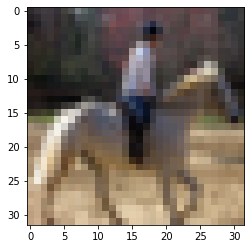

b'horse' , b'horse'


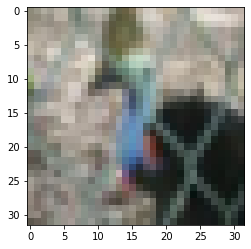

b'bird' , b'bird'


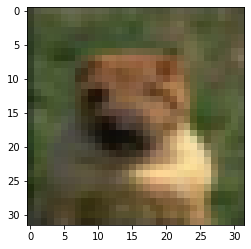

b'dog' , b'dog'


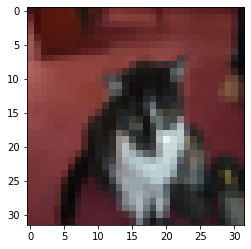

b'dog' , b'cat'


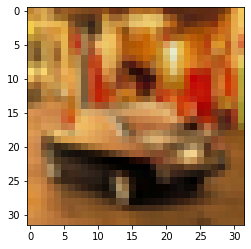

b'truck' , b'automobile'


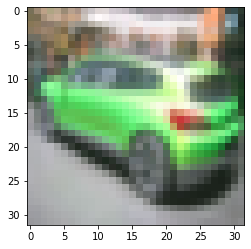

b'automobile' , b'automobile'


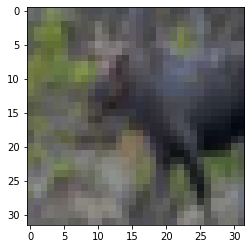

b'deer' , b'deer'


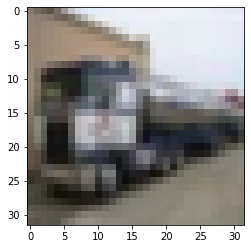

b'truck' , b'truck'


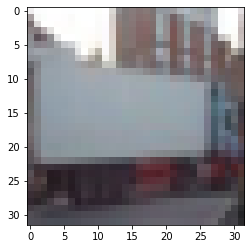

b'truck' , b'truck'


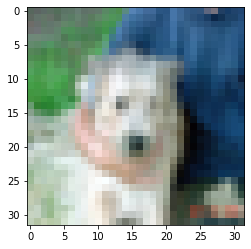

b'dog' , b'dog'


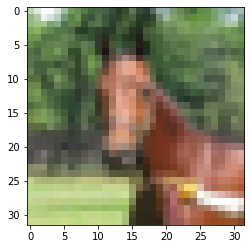

b'horse' , b'horse'


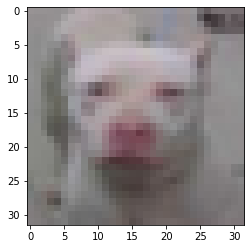

b'dog' , b'dog'


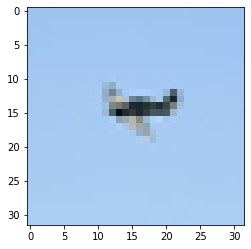

b'airplane' , b'airplane'


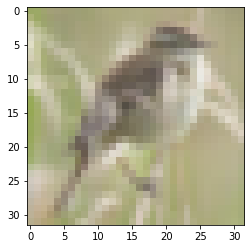

b'bird' , b'bird'


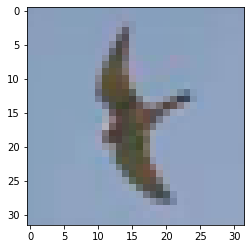

b'bird' , b'bird'


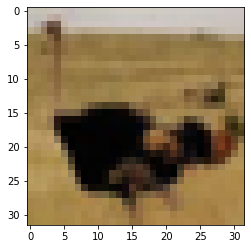

b'bird' , b'bird'


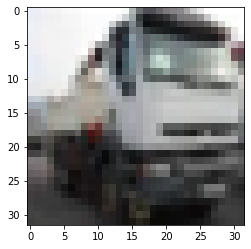

b'truck' , b'truck'


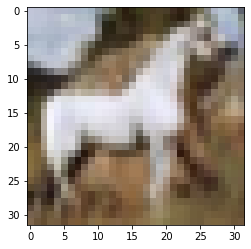

b'dog' , b'horse'


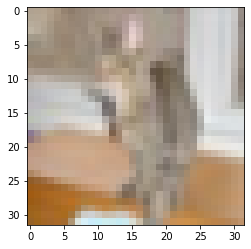

b'bird' , b'cat'


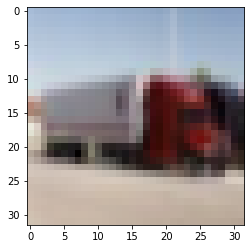

b'truck' , b'truck'


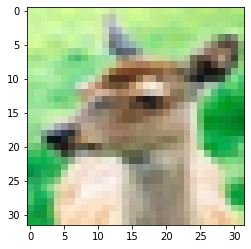

b'deer' , b'deer'


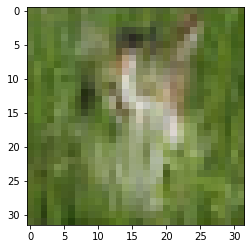

b'deer' , b'cat'


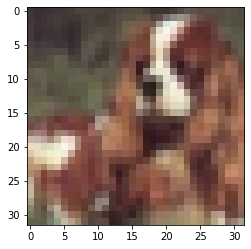

b'dog' , b'dog'


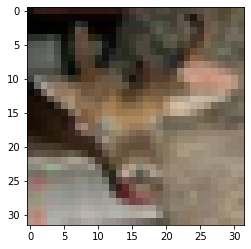

b'cat' , b'deer'


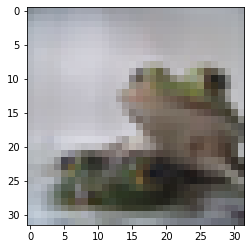

b'cat' , b'frog'


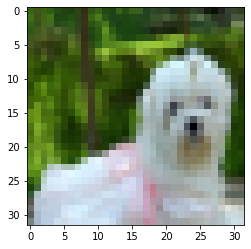

b'bird' , b'dog'


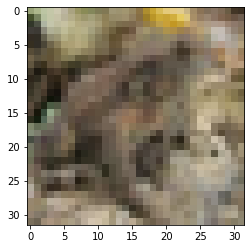

b'frog' , b'frog'


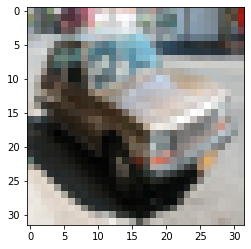

b'automobile' , b'automobile'


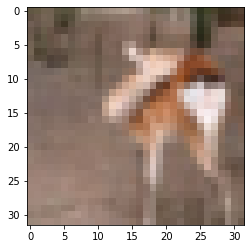

b'dog' , b'deer'


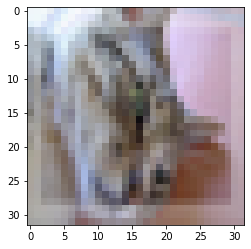

b'cat' , b'cat'


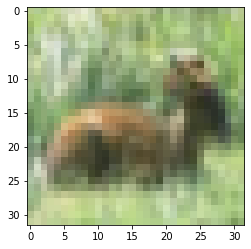

b'deer' , b'deer'


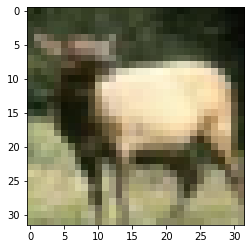

b'deer' , b'deer'


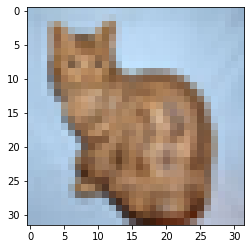

b'cat' , b'cat'


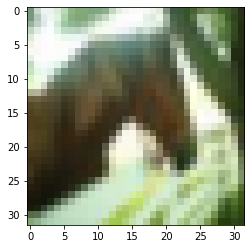

b'horse' , b'horse'


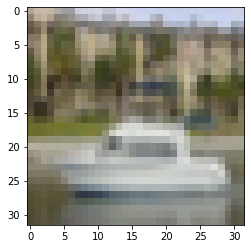

b'ship' , b'ship'


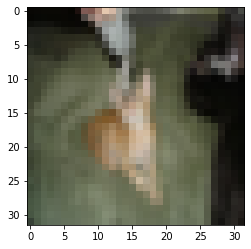

b'deer' , b'cat'


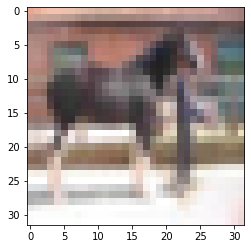

b'horse' , b'horse'


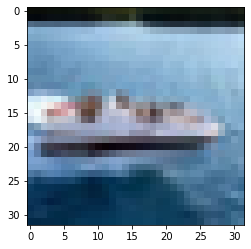

b'ship' , b'ship'


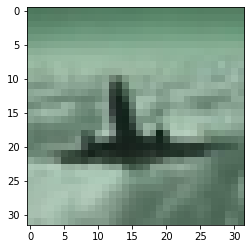

b'ship' , b'airplane'


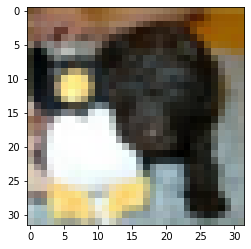

b'dog' , b'dog'


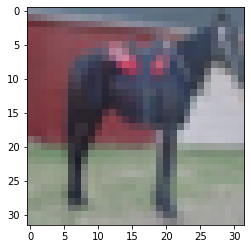

b'horse' , b'horse'


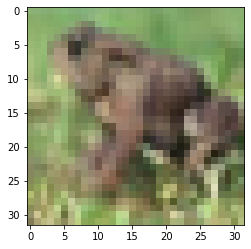

b'frog' , b'frog'


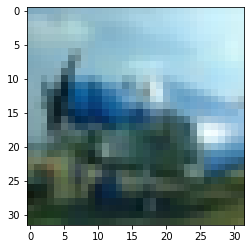

b'truck' , b'airplane'


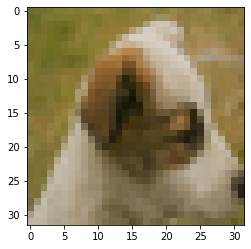

b'dog' , b'dog'


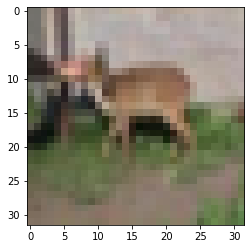

b'deer' , b'deer'


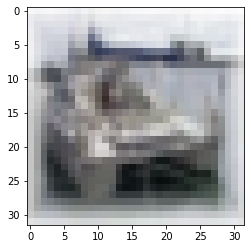

b'truck' , b'ship'


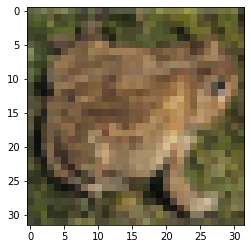

b'frog' , b'frog'


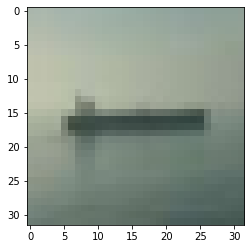

b'ship' , b'ship'


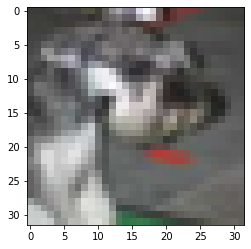

b'dog' , b'dog'


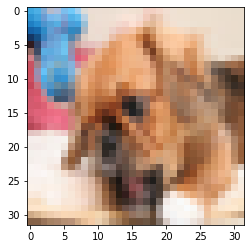

b'dog' , b'dog'


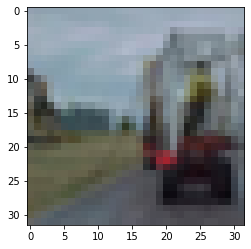

b'airplane' , b'truck'


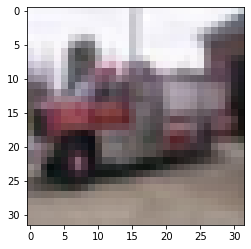

b'truck' , b'truck'


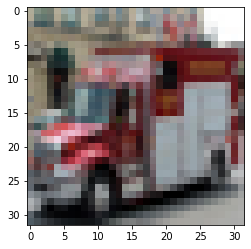

b'truck' , b'truck'


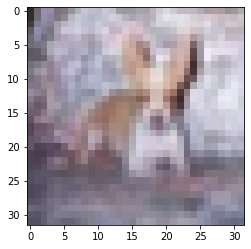

b'deer' , b'dog'


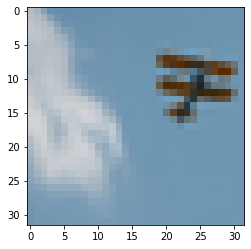

b'airplane' , b'airplane'


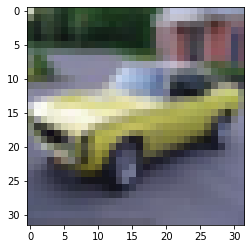

b'automobile' , b'automobile'


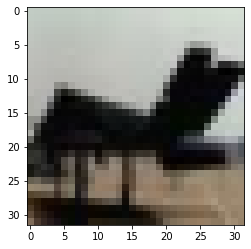

b'horse' , b'airplane'


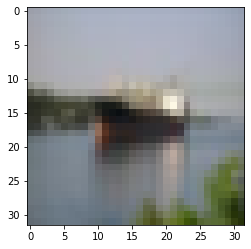

b'ship' , b'ship'


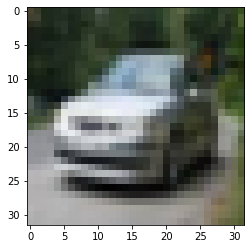

b'automobile' , b'automobile'


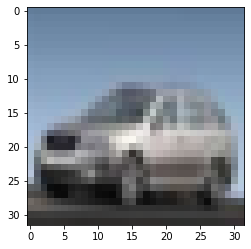

b'automobile' , b'automobile'


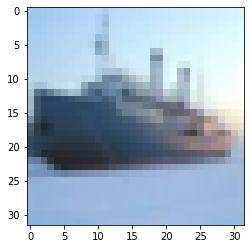

b'ship' , b'ship'


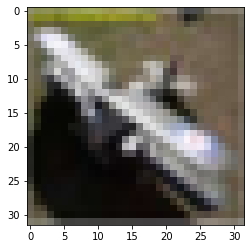

b'airplane' , b'airplane'


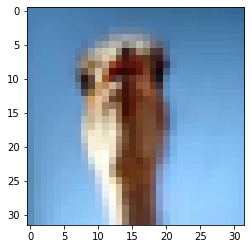

b'dog' , b'bird'


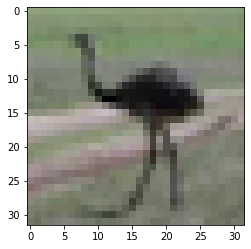

b'bird' , b'bird'


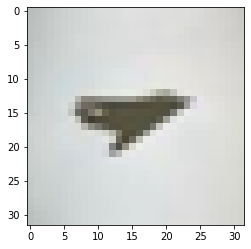

b'airplane' , b'airplane'


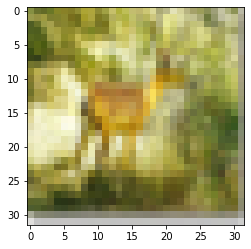

b'deer' , b'deer'


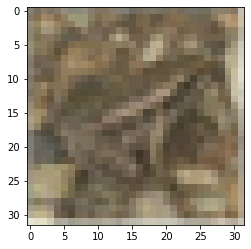

b'frog' , b'frog'


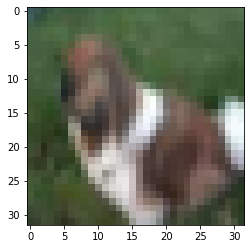

b'dog' , b'dog'


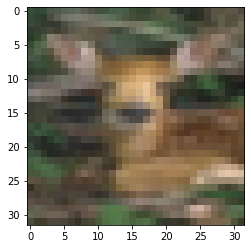

b'cat' , b'deer'


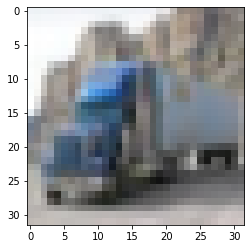

b'truck' , b'truck'


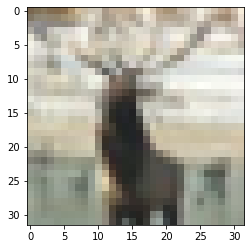

b'deer' , b'deer'


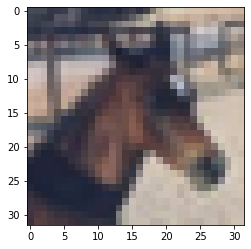

b'horse' , b'horse'


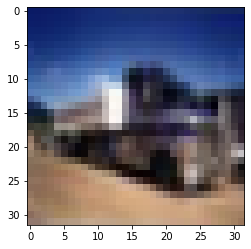

b'truck' , b'truck'


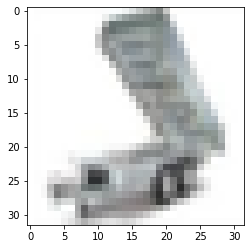

b'truck' , b'truck'


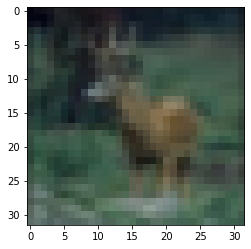

b'deer' , b'deer'


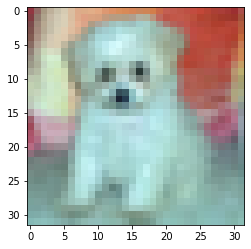

b'dog' , b'dog'


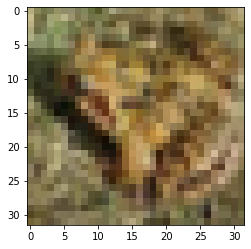

b'frog' , b'frog'


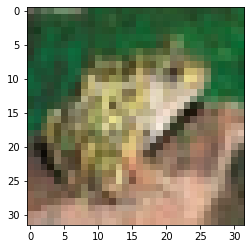

b'frog' , b'frog'


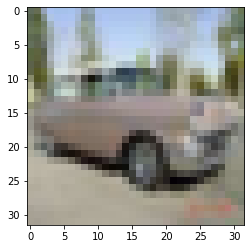

b'automobile' , b'automobile'


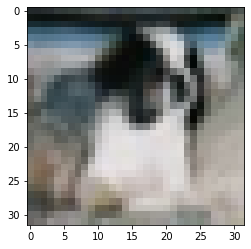

b'dog' , b'dog'


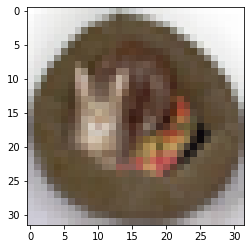

b'frog' , b'cat'


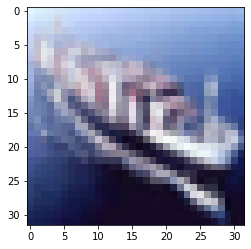

b'ship' , b'ship'


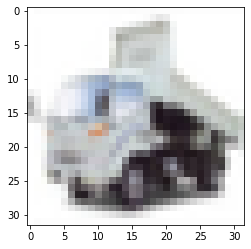

b'truck' , b'truck'


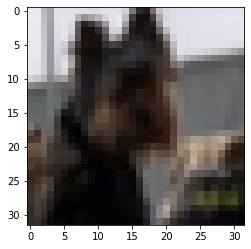

b'cat' , b'dog'


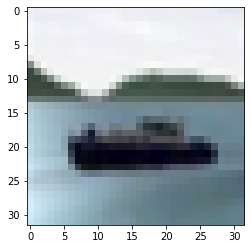

b'ship' , b'ship'


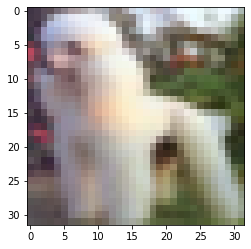

b'dog' , b'dog'


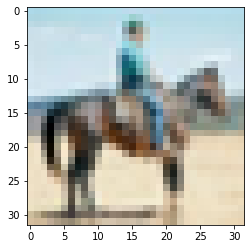

b'horse' , b'horse'


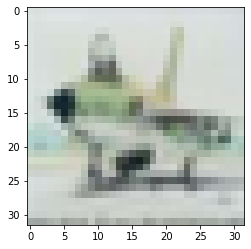

b'airplane' , b'airplane'


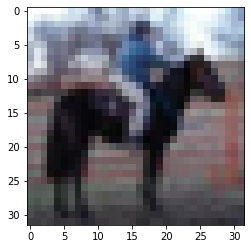

b'horse' , b'horse'


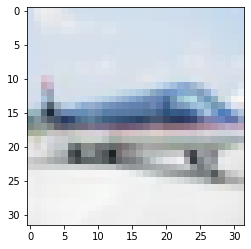

b'airplane' , b'airplane'


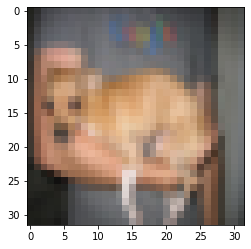

b'dog' , b'dog'


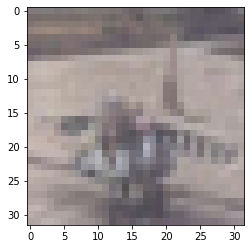

b'airplane' , b'airplane'


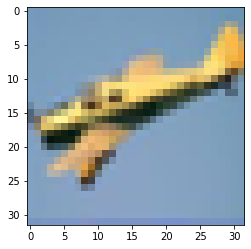

b'airplane' , b'airplane'


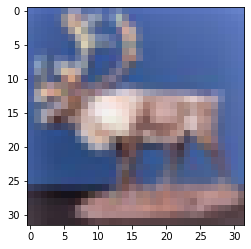

b'deer' , b'deer'


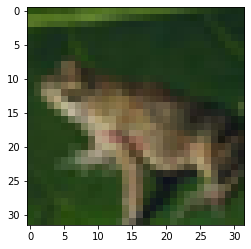

b'frog' , b'frog'


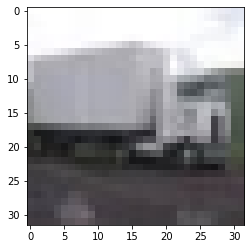

b'truck' , b'truck'


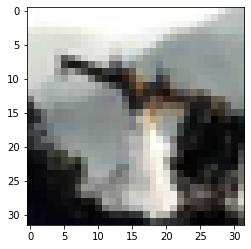

b'cat' , b'airplane'


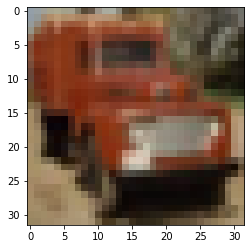

b'truck' , b'truck'


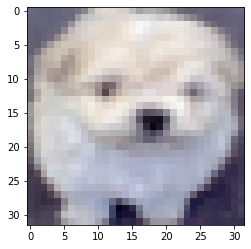

b'dog' , b'dog'


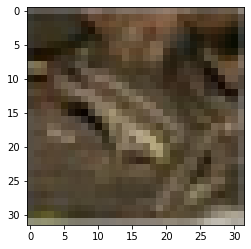

b'frog' , b'frog'


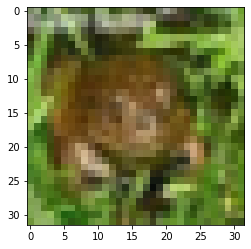

b'frog' , b'frog'


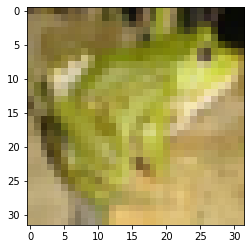

b'frog' , b'frog'


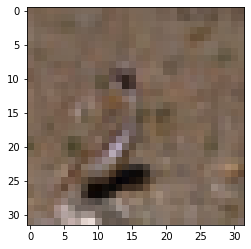

b'bird' , b'bird'


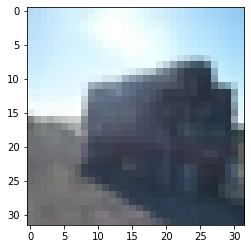

b'ship' , b'truck'


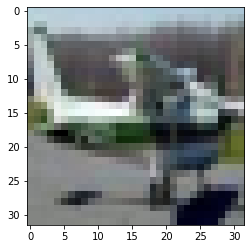

b'airplane' , b'airplane'


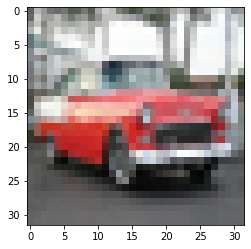

b'automobile' , b'automobile'


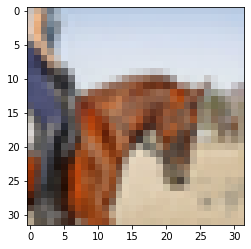

b'dog' , b'horse'


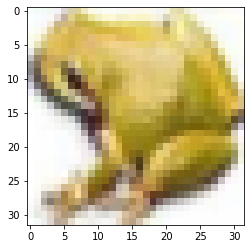

b'frog' , b'frog'


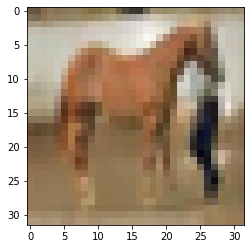

b'horse' , b'horse'


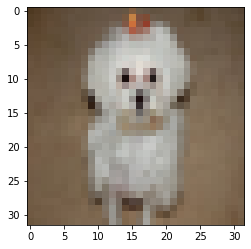

b'dog' , b'dog'


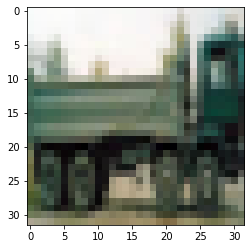

b'truck' , b'truck'


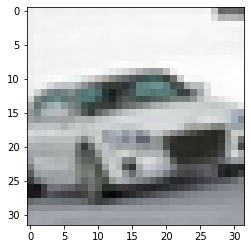

b'automobile' , b'automobile'


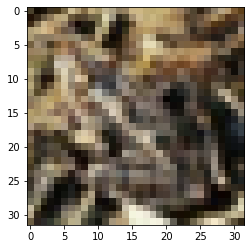

b'frog' , b'frog'


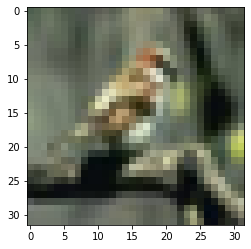

b'bird' , b'bird'


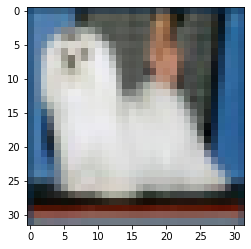

b'dog' , b'dog'


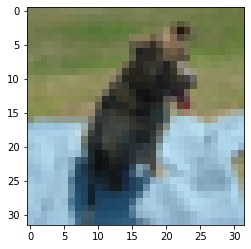

b'dog' , b'dog'


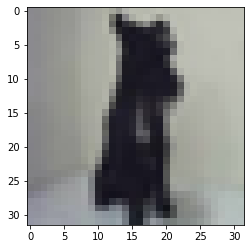

b'cat' , b'dog'


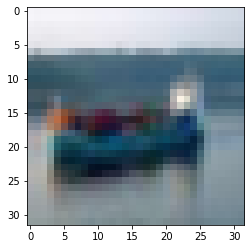

b'ship' , b'ship'


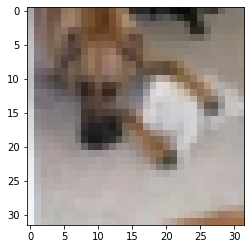

b'dog' , b'dog'


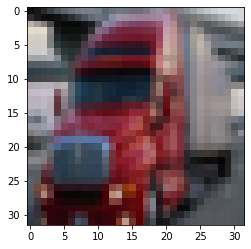

b'truck' , b'truck'


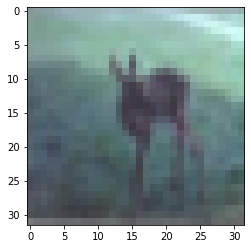

b'deer' , b'deer'


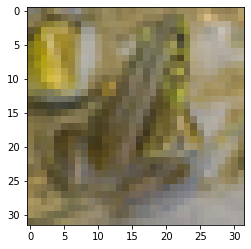

b'frog' , b'frog'


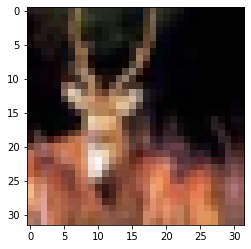

b'deer' , b'deer'


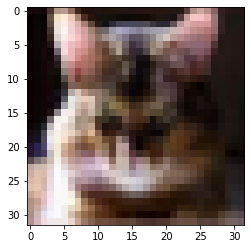

b'cat' , b'cat'


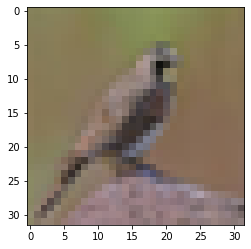

b'bird' , b'bird'


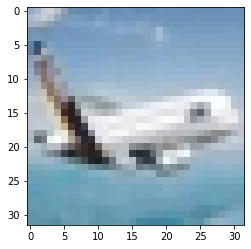

b'airplane' , b'airplane'


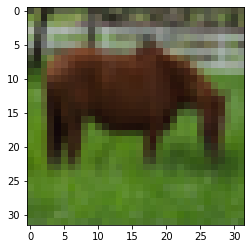

b'horse' , b'horse'


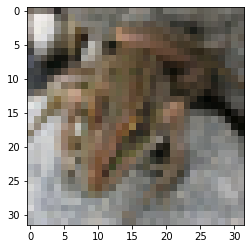

b'frog' , b'frog'


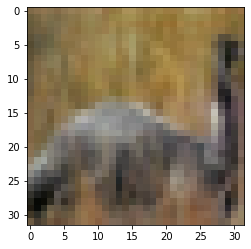

b'frog' , b'bird'


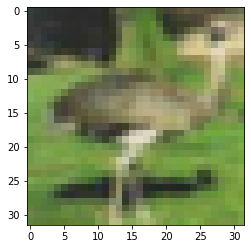

b'bird' , b'bird'


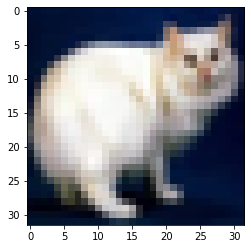

b'dog' , b'cat'


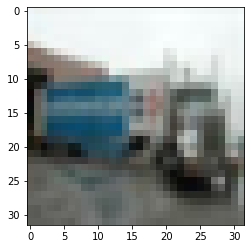

b'truck' , b'truck'


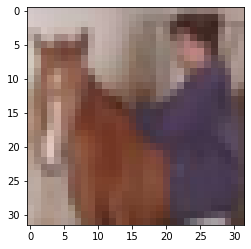

b'cat' , b'horse'


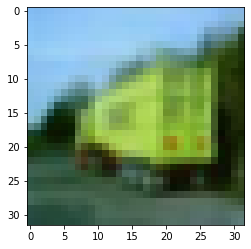

b'truck' , b'truck'


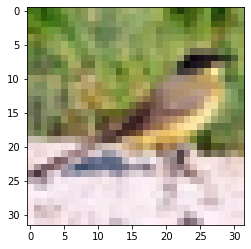

b'bird' , b'bird'


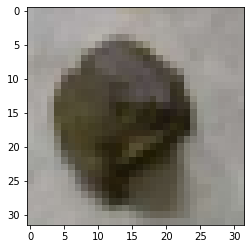

b'frog' , b'frog'


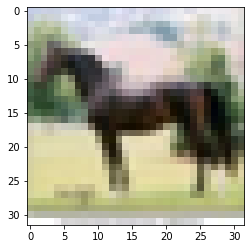

b'horse' , b'horse'


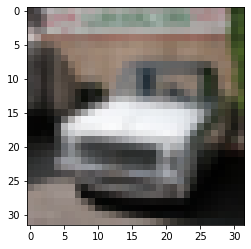

b'automobile' , b'automobile'


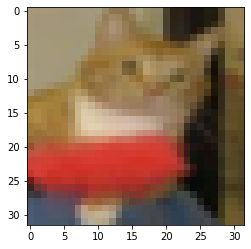

b'dog' , b'cat'


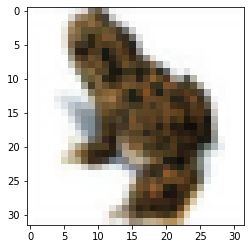

b'frog' , b'frog'


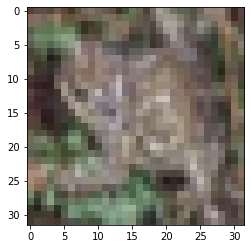

b'frog' , b'frog'


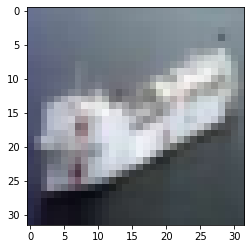

b'ship' , b'ship'


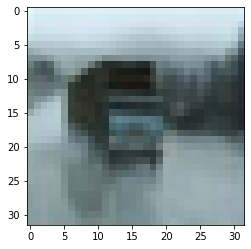

b'ship' , b'truck'


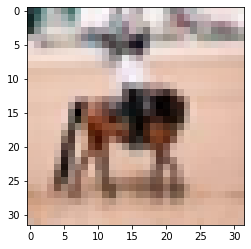

b'horse' , b'horse'


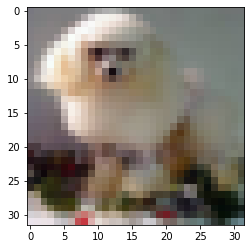

b'dog' , b'dog'


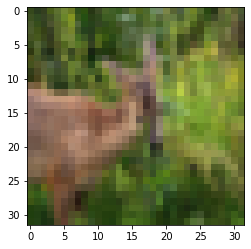

b'deer' , b'deer'


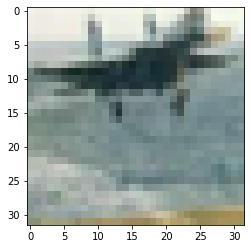

b'airplane' , b'airplane'


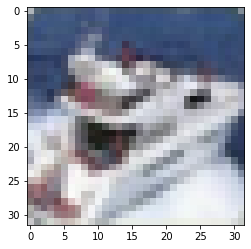

b'ship' , b'ship'


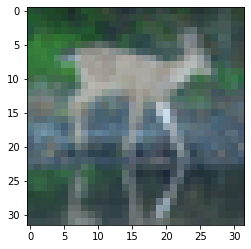

b'deer' , b'deer'


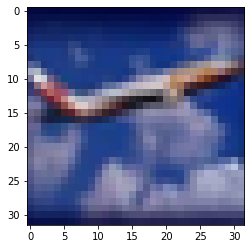

b'airplane' , b'airplane'


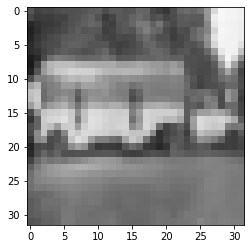

b'truck' , b'truck'


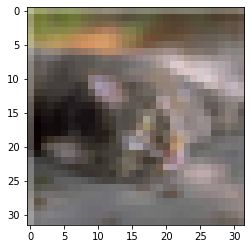

b'cat' , b'cat'


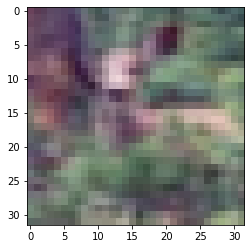

b'deer' , b'deer'


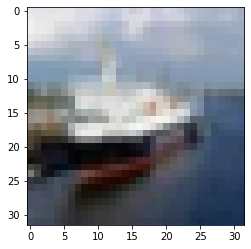

b'ship' , b'ship'


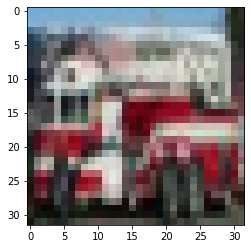

b'truck' , b'truck'


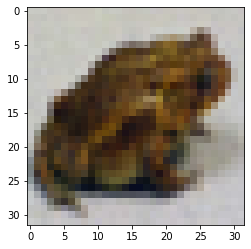

b'frog' , b'frog'


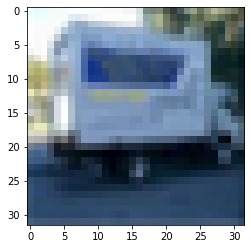

b'truck' , b'truck'


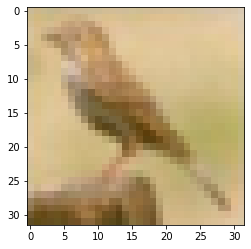

b'bird' , b'bird'


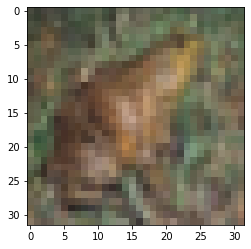

b'frog' , b'frog'


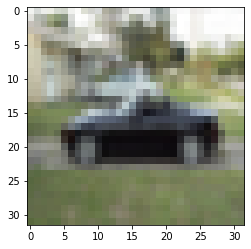

b'automobile' , b'automobile'


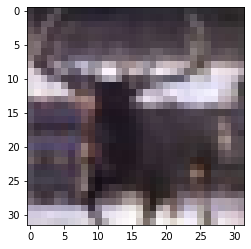

b'deer' , b'deer'


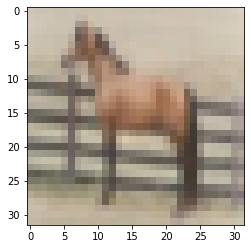

b'horse' , b'horse'


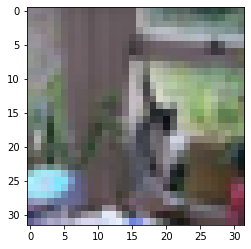

b'bird' , b'cat'


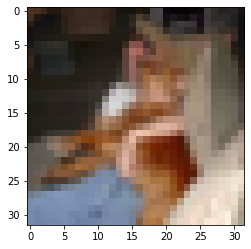

b'horse' , b'dog'


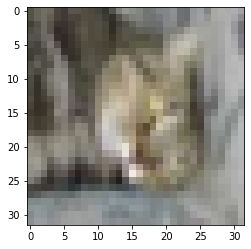

b'cat' , b'cat'


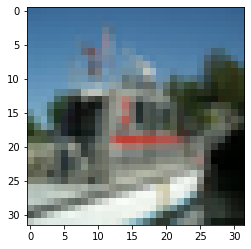

b'ship' , b'ship'


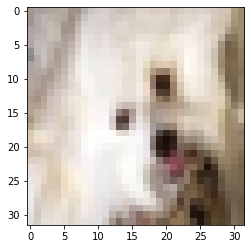

b'dog' , b'dog'


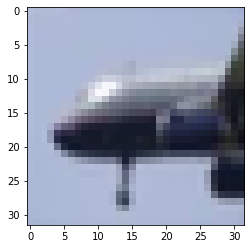

b'airplane' , b'airplane'


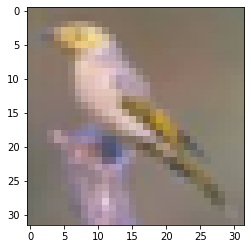

b'bird' , b'bird'


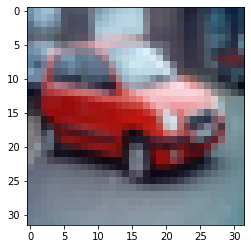

b'automobile' , b'automobile'


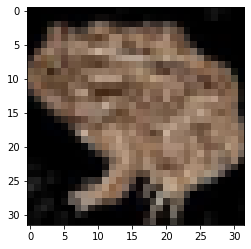

b'frog' , b'frog'


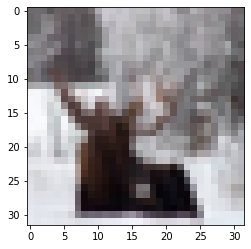

b'deer' , b'deer'


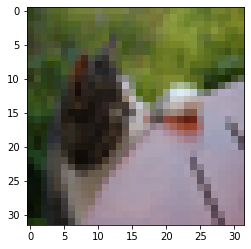

b'bird' , b'cat'


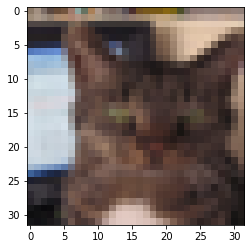

b'cat' , b'cat'


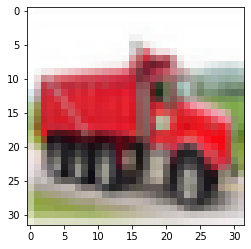

b'truck' , b'truck'


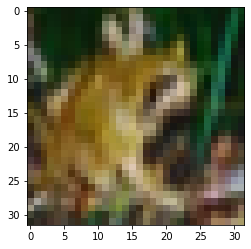

b'frog' , b'frog'


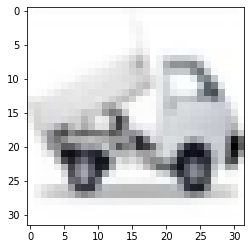

b'truck' , b'truck'


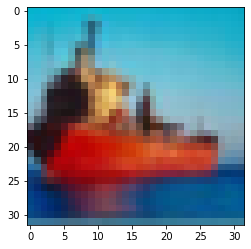

b'ship' , b'ship'


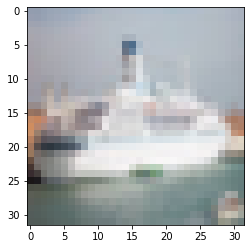

b'ship' , b'ship'


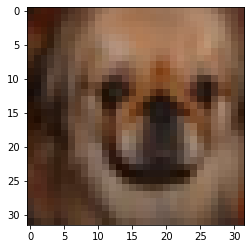

b'dog' , b'dog'


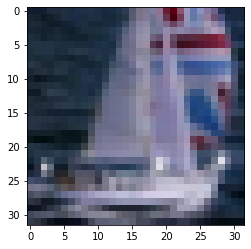

b'truck' , b'ship'


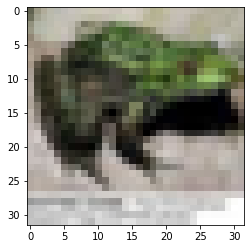

b'frog' , b'frog'


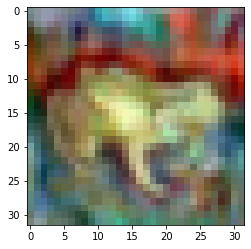

b'frog' , b'frog'


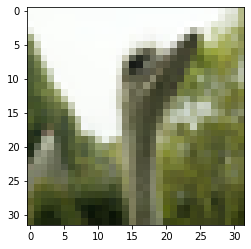

b'deer' , b'bird'


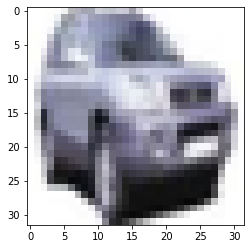

b'automobile' , b'automobile'


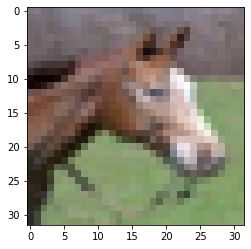

b'horse' , b'horse'


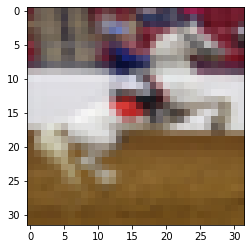

b'automobile' , b'horse'


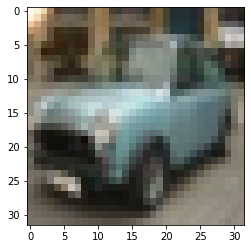

b'automobile' , b'automobile'


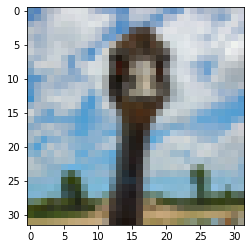

b'dog' , b'bird'


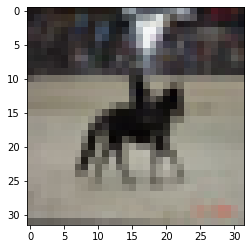

b'horse' , b'horse'


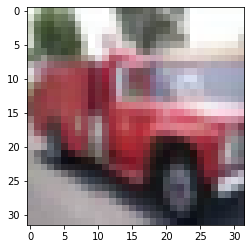

b'truck' , b'truck'


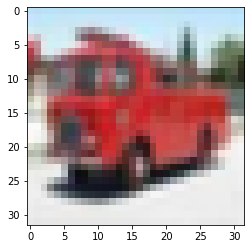

b'automobile' , b'truck'


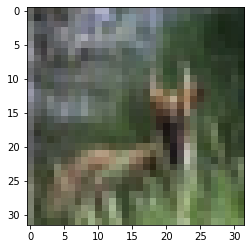

b'deer' , b'deer'


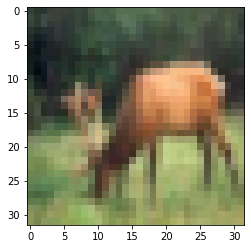

b'deer' , b'deer'


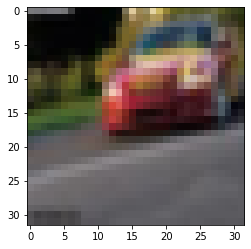

b'automobile' , b'automobile'


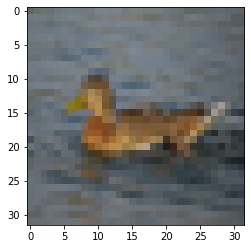

b'airplane' , b'bird'


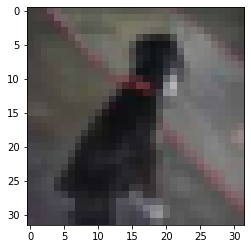

b'cat' , b'dog'


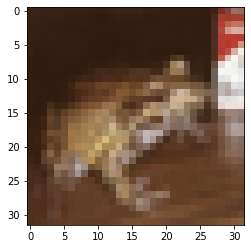

b'frog' , b'frog'


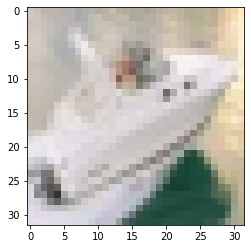

b'ship' , b'ship'


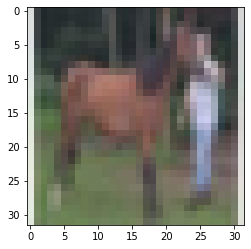

b'horse' , b'horse'


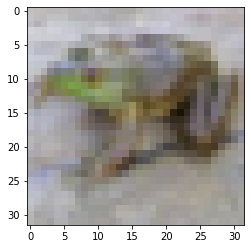

b'frog' , b'frog'


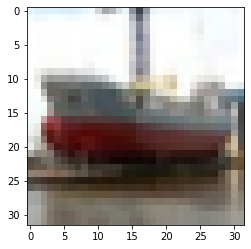

b'ship' , b'ship'


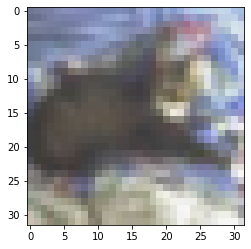

b'horse' , b'cat'


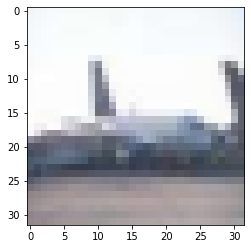

b'ship' , b'airplane'


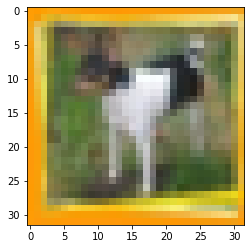

b'horse' , b'dog'


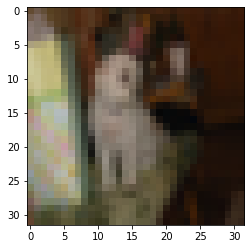

b'dog' , b'dog'


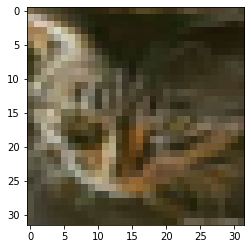

b'frog' , b'cat'


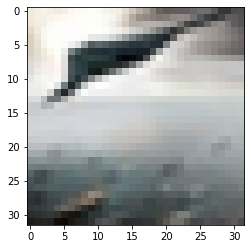

b'airplane' , b'airplane'


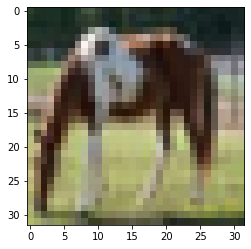

b'horse' , b'horse'


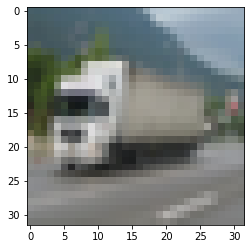

b'truck' , b'truck'


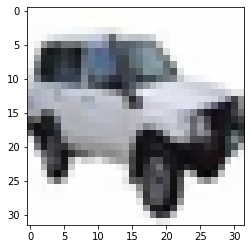

b'automobile' , b'automobile'


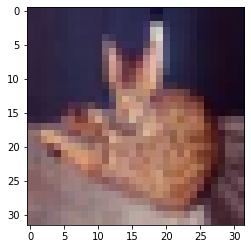

b'cat' , b'cat'


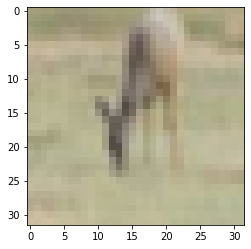

b'deer' , b'deer'


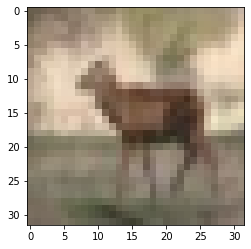

b'deer' , b'deer'


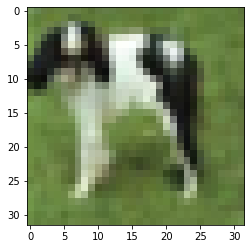

b'dog' , b'dog'


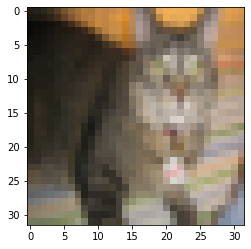

b'cat' , b'cat'


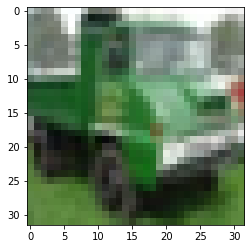

b'truck' , b'truck'


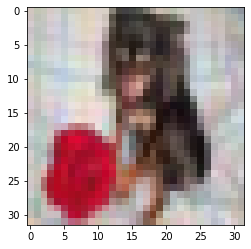

b'dog' , b'dog'


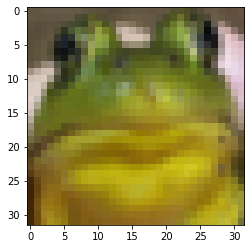

b'frog' , b'frog'


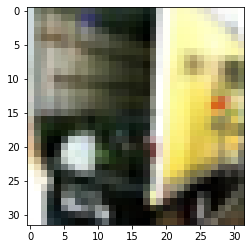

b'truck' , b'truck'


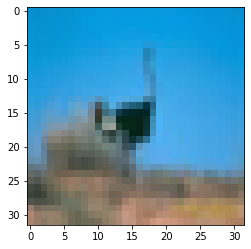

b'deer' , b'bird'


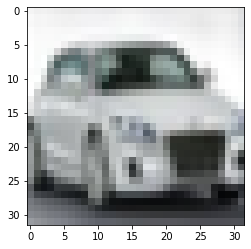

b'automobile' , b'automobile'


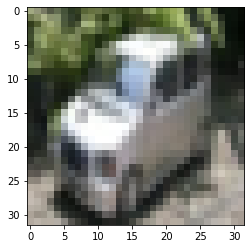

b'automobile' , b'automobile'


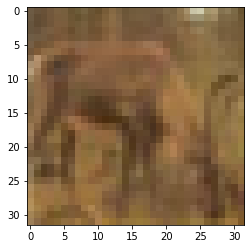

b'deer' , b'deer'


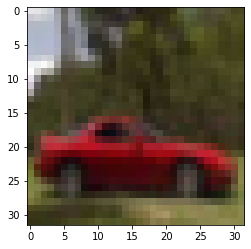

b'automobile' , b'automobile'


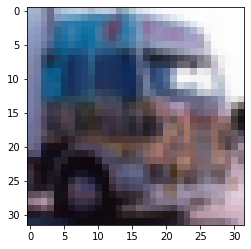

b'truck' , b'truck'


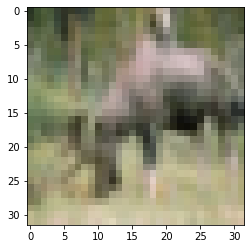

b'deer' , b'deer'


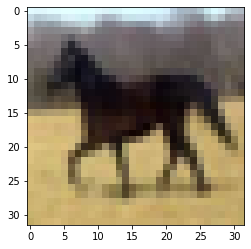

b'horse' , b'horse'


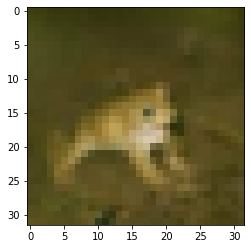

b'frog' , b'frog'


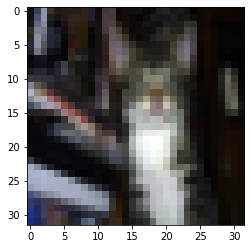

b'cat' , b'cat'


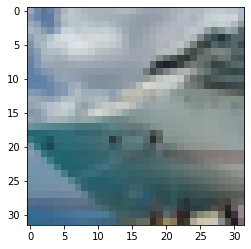

b'airplane' , b'ship'


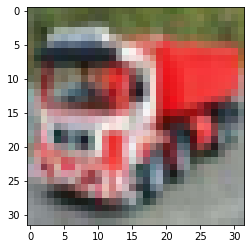

b'truck' , b'truck'


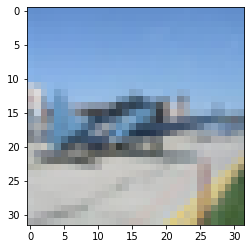

b'airplane' , b'airplane'


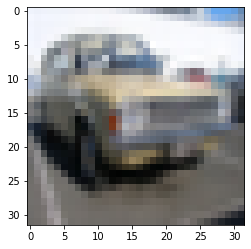

b'automobile' , b'automobile'


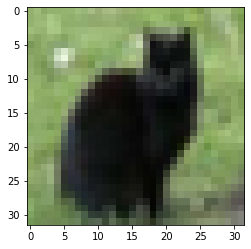

b'dog' , b'cat'


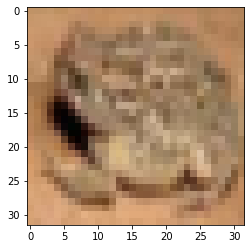

b'frog' , b'frog'


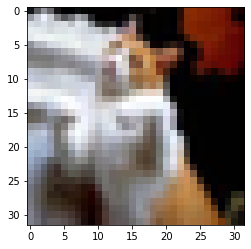

b'dog' , b'cat'


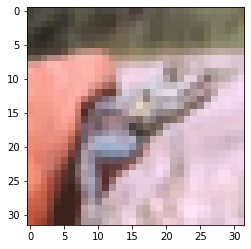

b'bird' , b'frog'


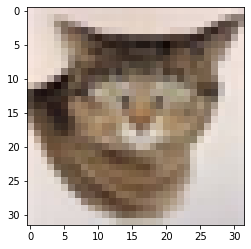

b'cat' , b'cat'


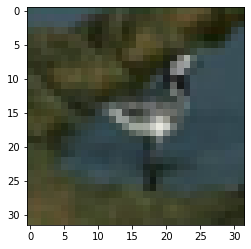

b'bird' , b'bird'


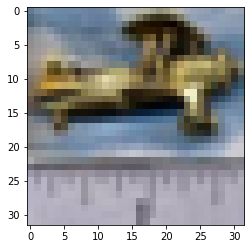

b'automobile' , b'airplane'


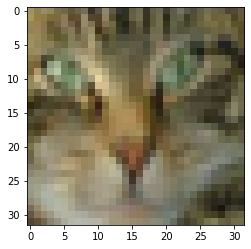

b'cat' , b'cat'


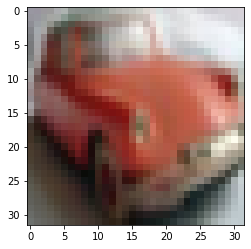

b'automobile' , b'automobile'


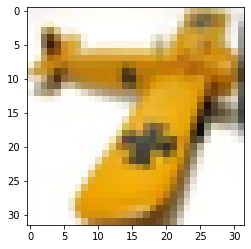

b'airplane' , b'airplane'


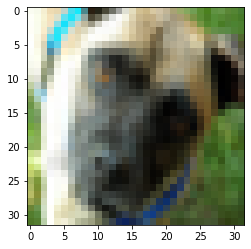

b'cat' , b'dog'


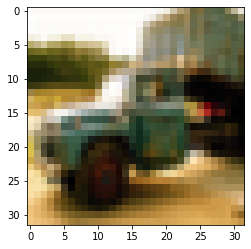

b'automobile' , b'truck'


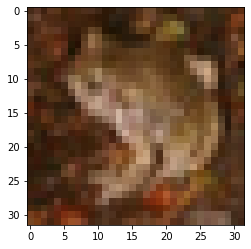

b'frog' , b'frog'


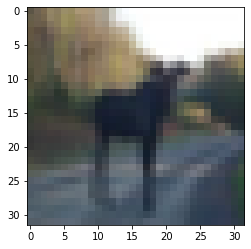

b'ship' , b'deer'


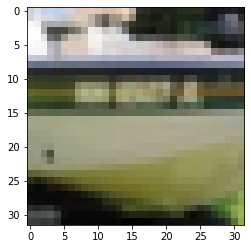

b'automobile' , b'ship'


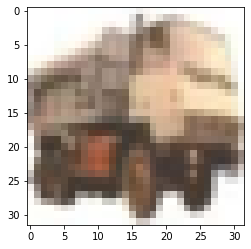

b'truck' , b'truck'


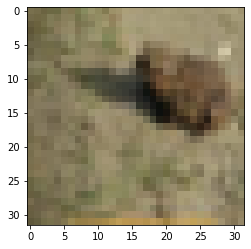

b'bird' , b'frog'


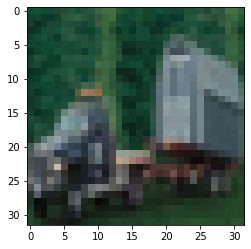

b'truck' , b'truck'


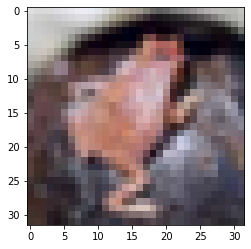

b'frog' , b'frog'


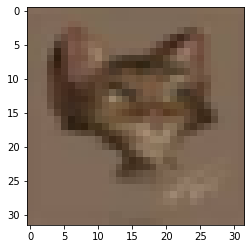

b'frog' , b'cat'


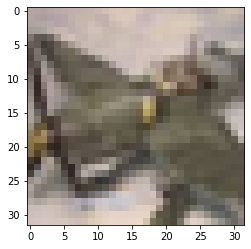

b'airplane' , b'airplane'


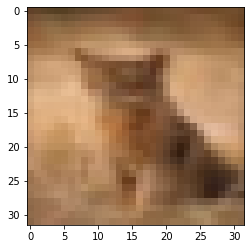

b'cat' , b'cat'


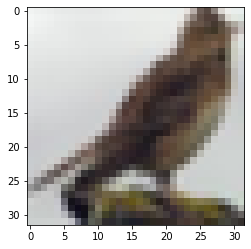

b'bird' , b'bird'


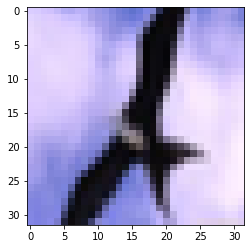

b'airplane' , b'bird'


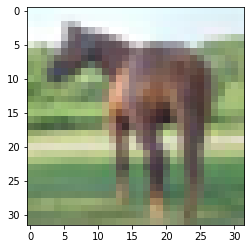

b'horse' , b'horse'


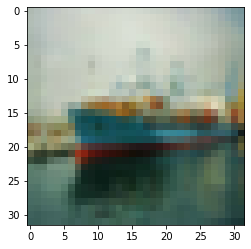

b'ship' , b'ship'


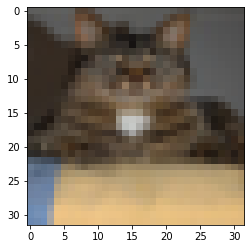

b'cat' , b'cat'


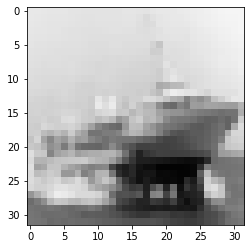

b'airplane' , b'ship'


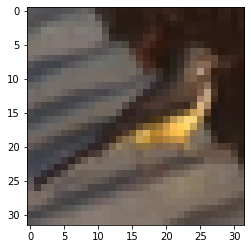

b'bird' , b'bird'


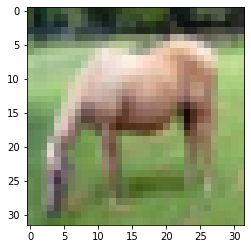

b'horse' , b'horse'


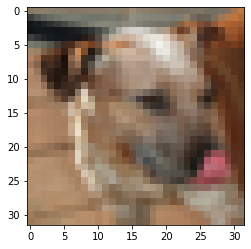

b'dog' , b'dog'


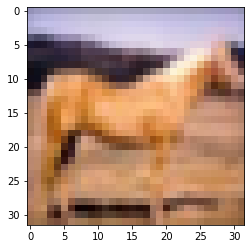

b'horse' , b'horse'


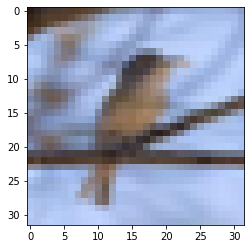

b'bird' , b'bird'


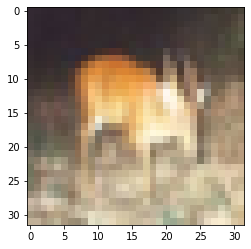

b'deer' , b'deer'


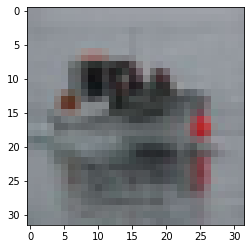

b'ship' , b'ship'


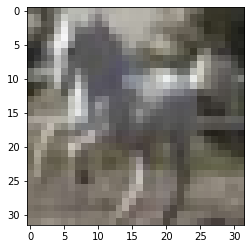

b'horse' , b'horse'


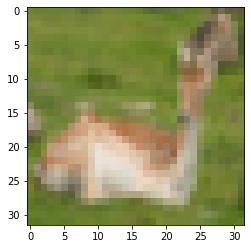

b'deer' , b'deer'


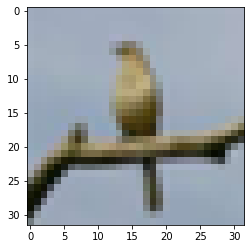

b'bird' , b'bird'


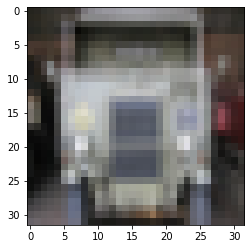

b'truck' , b'truck'


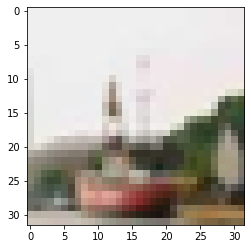

b'ship' , b'ship'


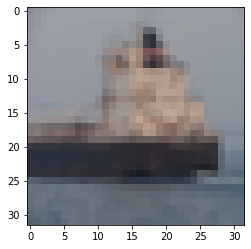

b'ship' , b'ship'


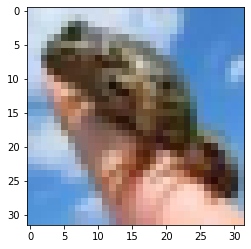

b'dog' , b'frog'


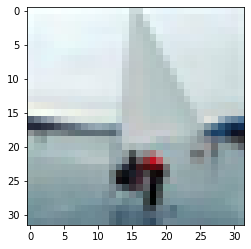

b'ship' , b'ship'


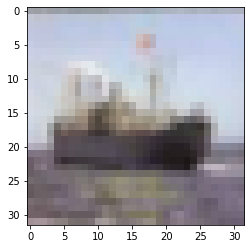

b'ship' , b'ship'


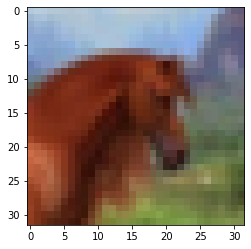

b'dog' , b'horse'


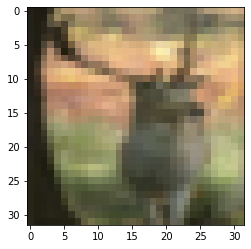

b'deer' , b'deer'


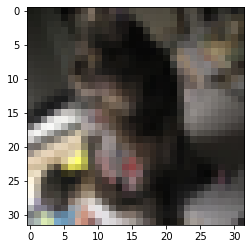

b'dog' , b'cat'


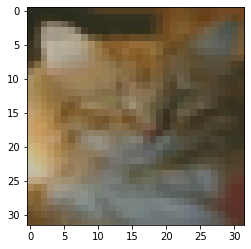

b'cat' , b'cat'


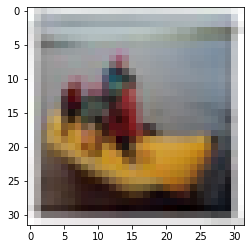

b'ship' , b'ship'


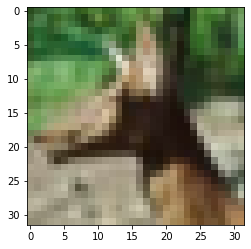

b'horse' , b'deer'


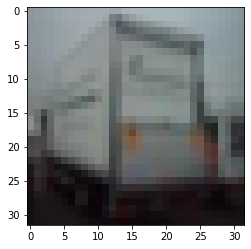

b'truck' , b'truck'


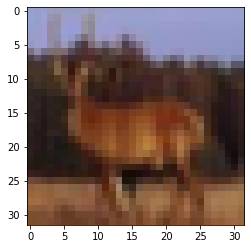

b'horse' , b'deer'


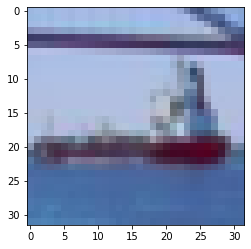

b'ship' , b'ship'


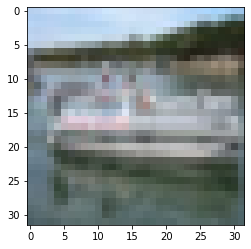

b'ship' , b'ship'


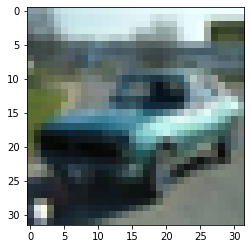

b'automobile' , b'automobile'


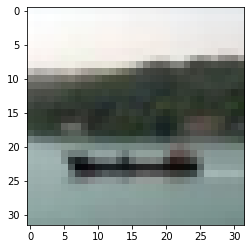

b'ship' , b'ship'


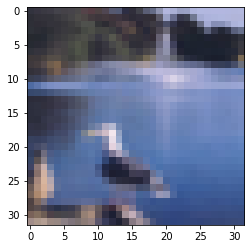

b'airplane' , b'bird'


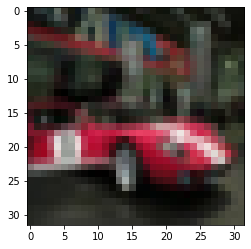

b'automobile' , b'automobile'


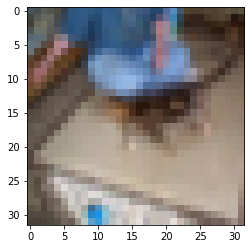

b'bird' , b'cat'


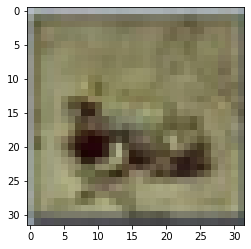

b'frog' , b'frog'


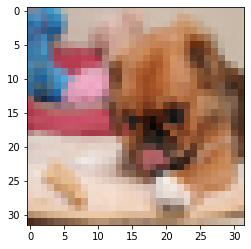

b'dog' , b'dog'


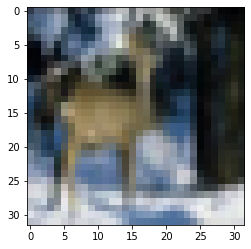

b'dog' , b'deer'


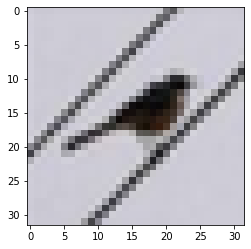

b'airplane' , b'bird'


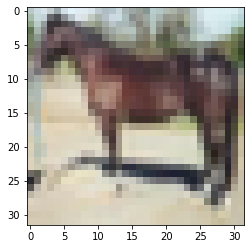

b'horse' , b'horse'


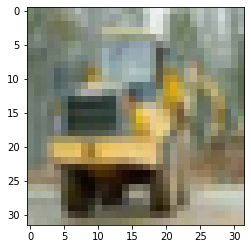

b'truck' , b'truck'


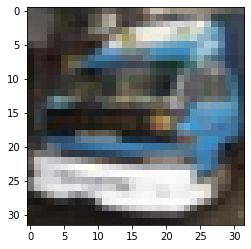

b'automobile' , b'truck'


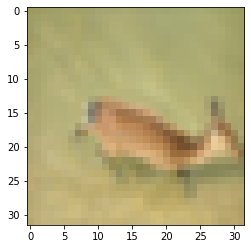

b'deer' , b'deer'


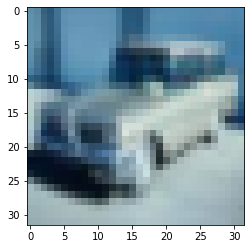

b'automobile' , b'automobile'


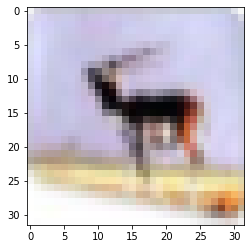

b'deer' , b'deer'


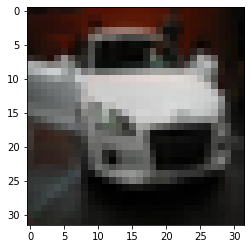

b'automobile' , b'automobile'


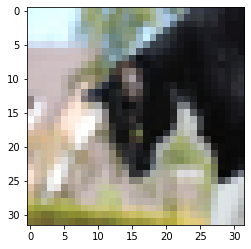

b'cat' , b'cat'


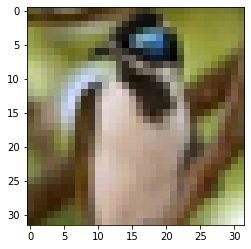

b'dog' , b'bird'


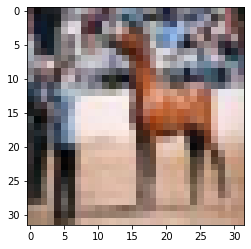

b'horse' , b'horse'


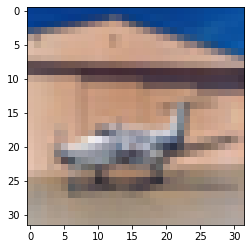

b'airplane' , b'airplane'


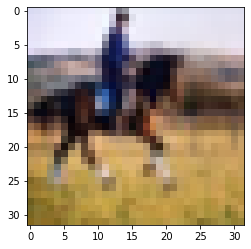

b'horse' , b'horse'


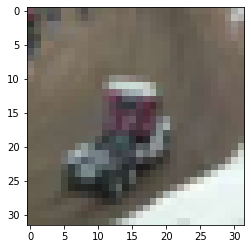

b'automobile' , b'truck'


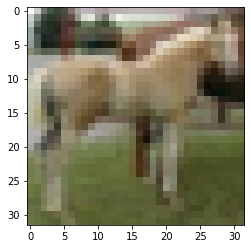

b'horse' , b'horse'


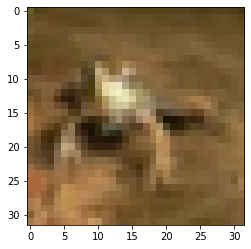

b'frog' , b'frog'


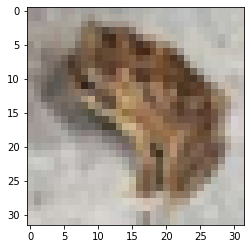

b'frog' , b'frog'


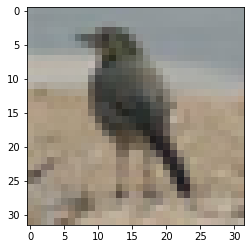

b'bird' , b'bird'


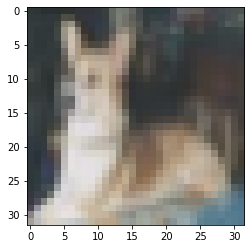

b'cat' , b'dog'


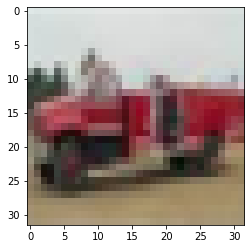

b'truck' , b'truck'


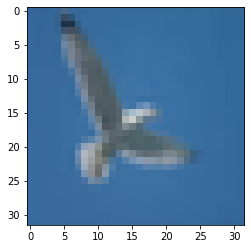

b'airplane' , b'bird'


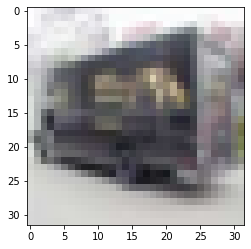

b'automobile' , b'truck'


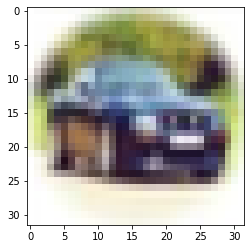

b'automobile' , b'automobile'


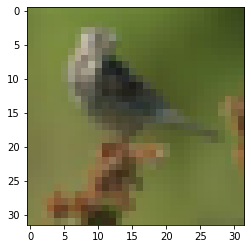

b'bird' , b'bird'


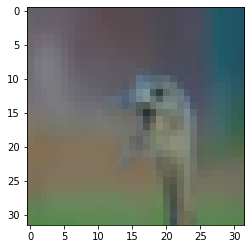

b'bird' , b'bird'


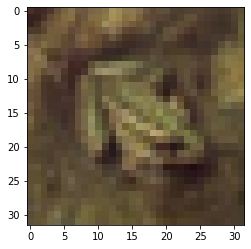

b'frog' , b'frog'


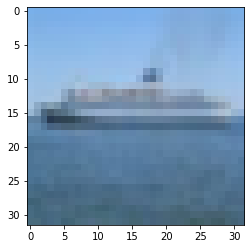

b'ship' , b'ship'


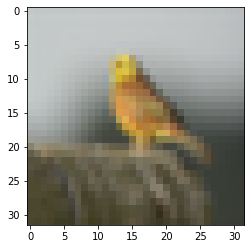

b'bird' , b'bird'


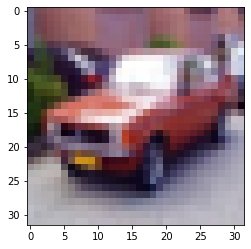

b'automobile' , b'automobile'


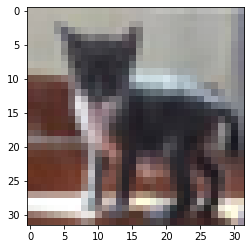

b'cat' , b'cat'


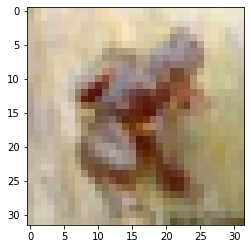

b'dog' , b'frog'


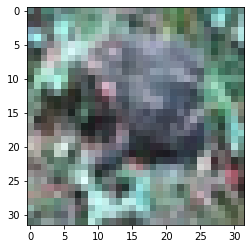

b'frog' , b'frog'


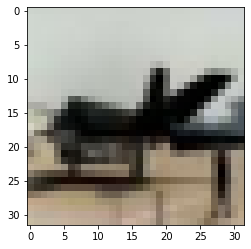

b'airplane' , b'airplane'


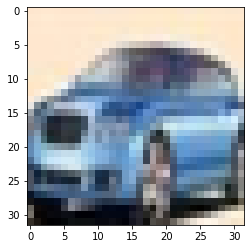

b'automobile' , b'automobile'


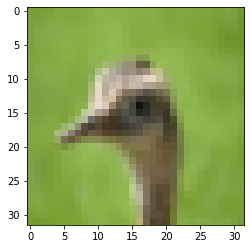

b'bird' , b'bird'


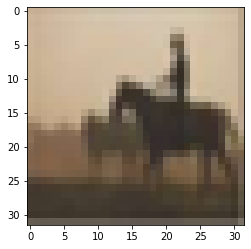

b'cat' , b'horse'


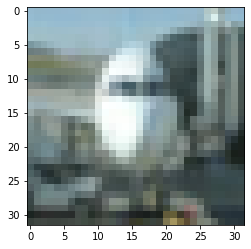

b'truck' , b'airplane'


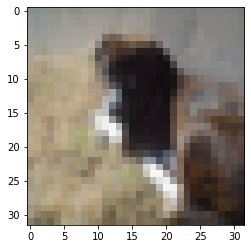

b'dog' , b'dog'


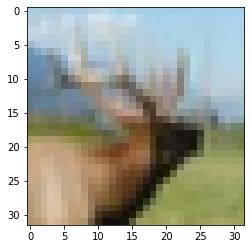

b'deer' , b'deer'


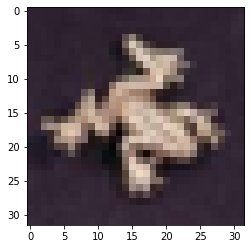

b'horse' , b'frog'


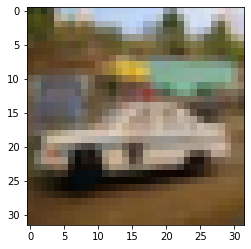

b'automobile' , b'automobile'


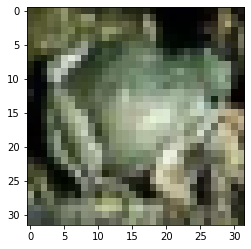

b'frog' , b'frog'


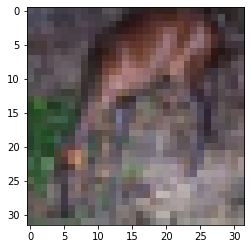

b'deer' , b'deer'


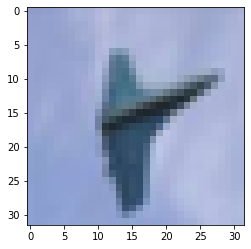

b'airplane' , b'airplane'


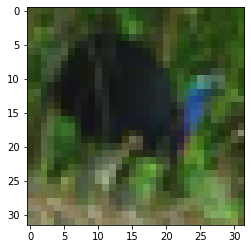

b'bird' , b'bird'


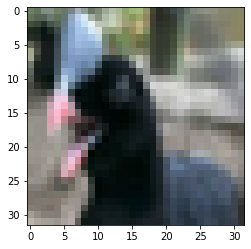

b'bird' , b'bird'


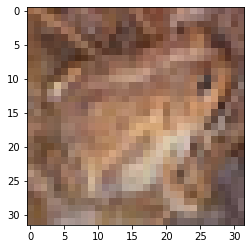

b'frog' , b'frog'


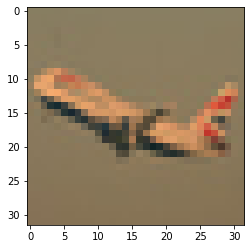

b'airplane' , b'airplane'


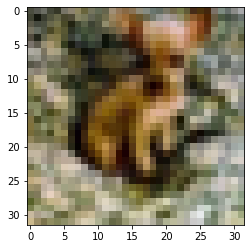

b'frog' , b'dog'


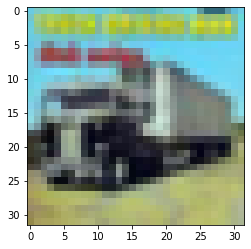

b'truck' , b'truck'


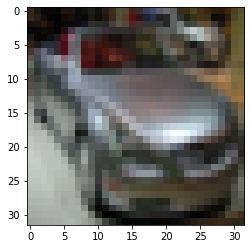

b'automobile' , b'automobile'


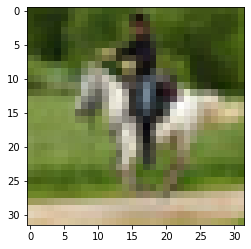

b'horse' , b'horse'


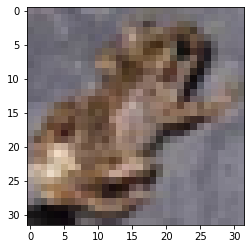

b'frog' , b'frog'


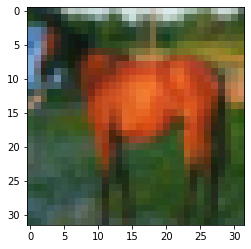

b'horse' , b'horse'


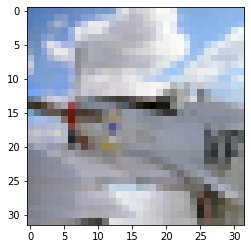

b'airplane' , b'airplane'


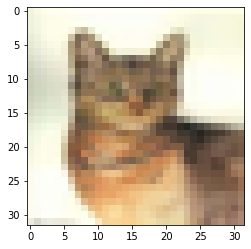

b'cat' , b'cat'


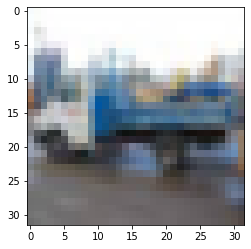

b'truck' , b'truck'


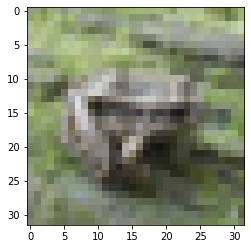

b'frog' , b'frog'


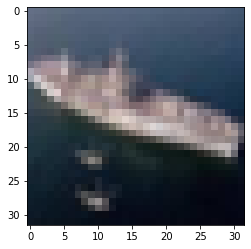

b'ship' , b'ship'


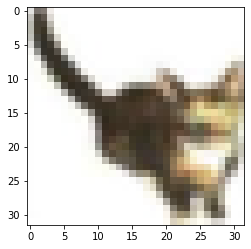

b'airplane' , b'cat'


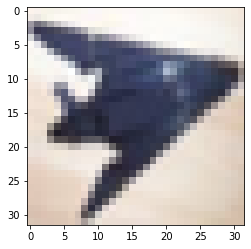

b'airplane' , b'airplane'


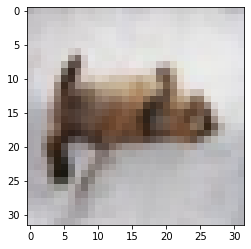

b'cat' , b'cat'


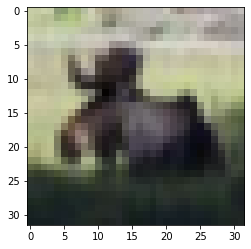

b'deer' , b'deer'


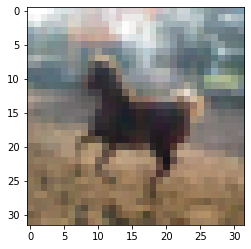

b'horse' , b'horse'


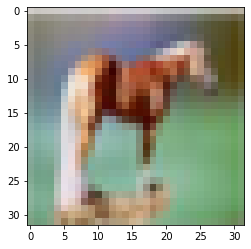

b'horse' , b'horse'


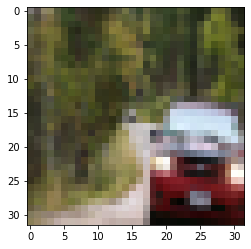

b'cat' , b'automobile'


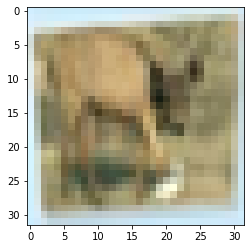

b'deer' , b'deer'


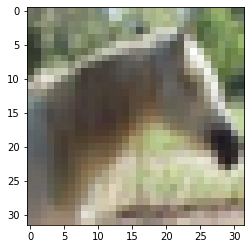

b'cat' , b'horse'


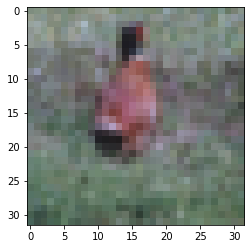

b'deer' , b'bird'


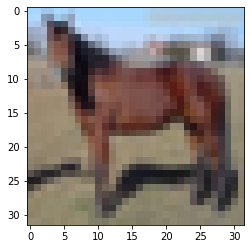

b'horse' , b'horse'


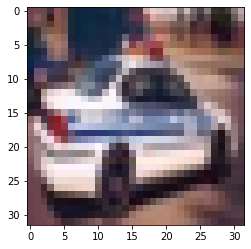

b'automobile' , b'automobile'


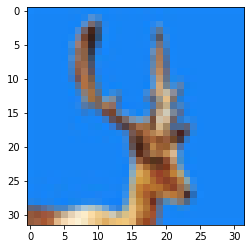

b'bird' , b'deer'


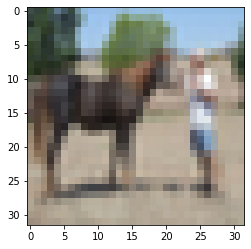

b'horse' , b'horse'


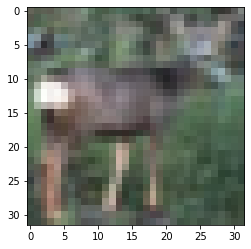

b'deer' , b'deer'


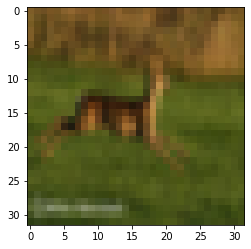

b'deer' , b'deer'


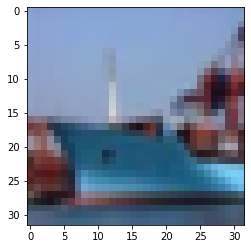

b'ship' , b'ship'


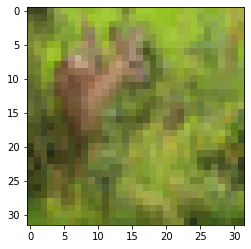

b'deer' , b'deer'


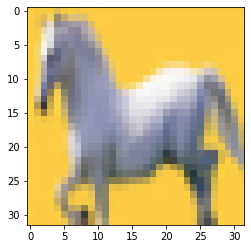

b'horse' , b'horse'


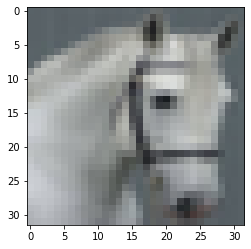

b'bird' , b'horse'


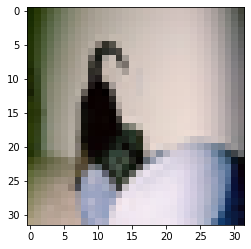

b'dog' , b'dog'


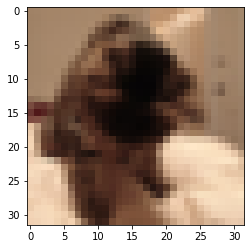

b'dog' , b'cat'


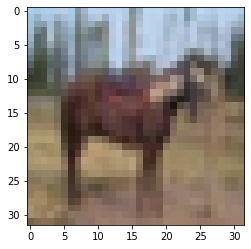

b'horse' , b'horse'


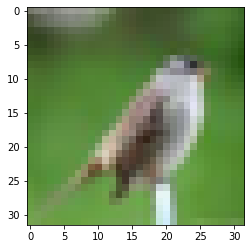

b'bird' , b'bird'


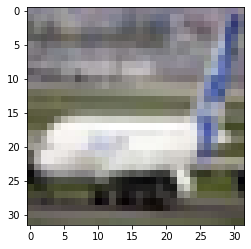

b'truck' , b'airplane'


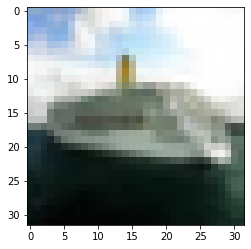

b'ship' , b'ship'


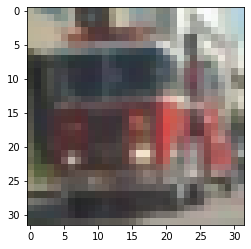

b'truck' , b'truck'


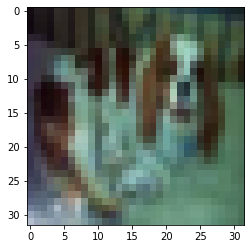

b'deer' , b'dog'


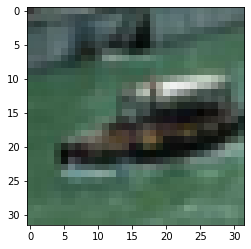

b'ship' , b'ship'


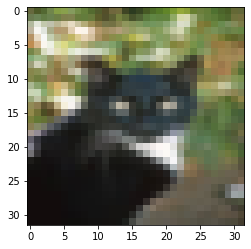

b'airplane' , b'cat'


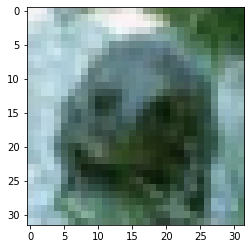

b'frog' , b'frog'


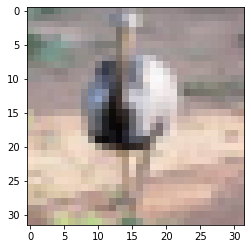

b'horse' , b'bird'


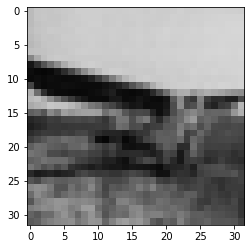

b'airplane' , b'airplane'


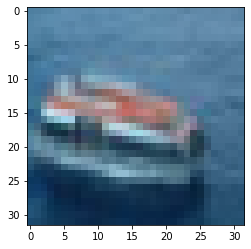

b'ship' , b'ship'


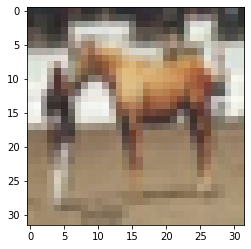

b'horse' , b'horse'


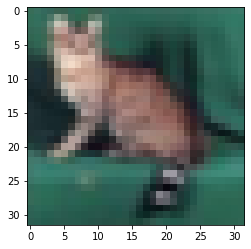

b'dog' , b'cat'


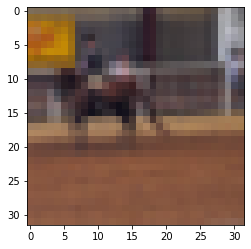

b'horse' , b'horse'


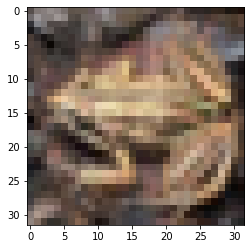

b'frog' , b'frog'


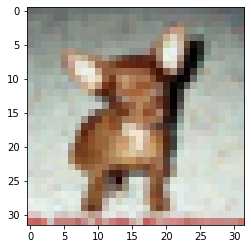

b'dog' , b'dog'


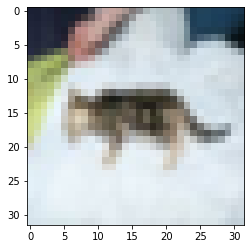

b'cat' , b'cat'


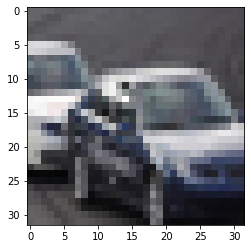

b'airplane' , b'automobile'


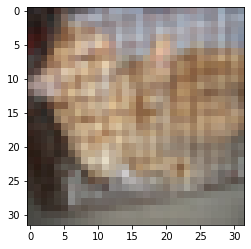

b'frog' , b'cat'


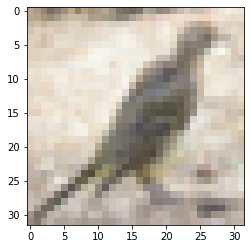

b'bird' , b'bird'


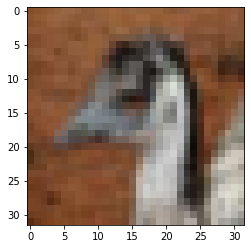

b'bird' , b'bird'


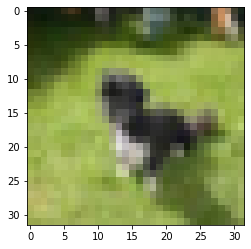

b'dog' , b'dog'


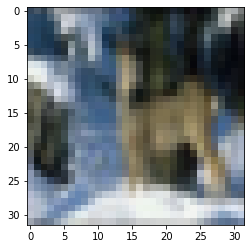

b'cat' , b'deer'


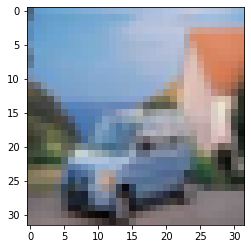

b'automobile' , b'automobile'


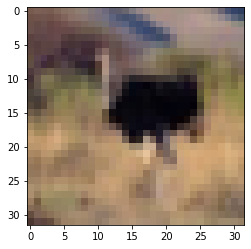

b'dog' , b'bird'


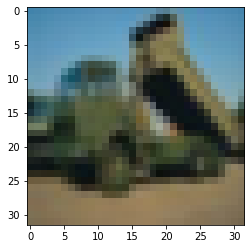

b'truck' , b'truck'


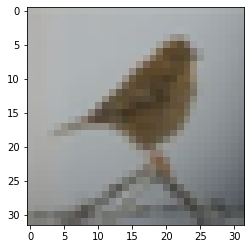

b'bird' , b'bird'


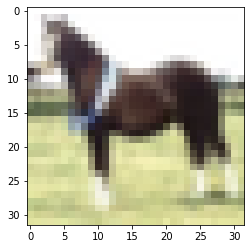

b'horse' , b'horse'


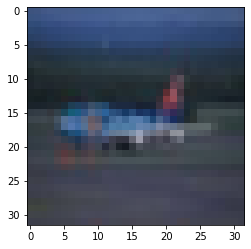

b'airplane' , b'airplane'


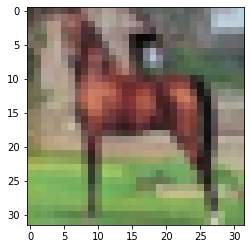

b'horse' , b'horse'


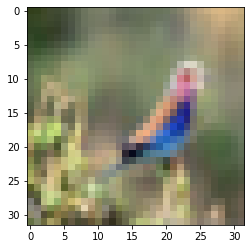

b'bird' , b'bird'


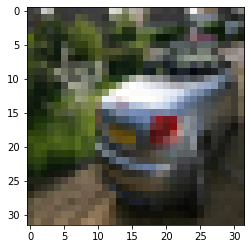

b'automobile' , b'automobile'


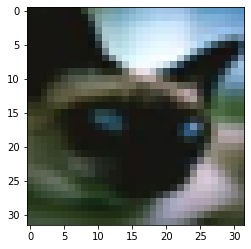

b'bird' , b'cat'


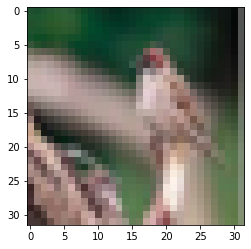

b'deer' , b'bird'


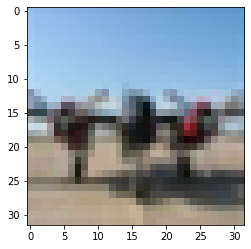

b'airplane' , b'airplane'


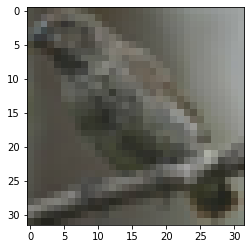

b'bird' , b'bird'


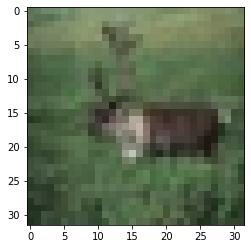

b'deer' , b'deer'


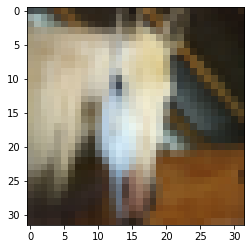

b'dog' , b'horse'


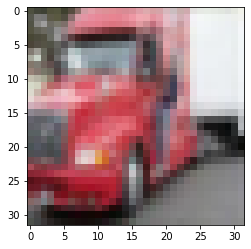

b'truck' , b'truck'


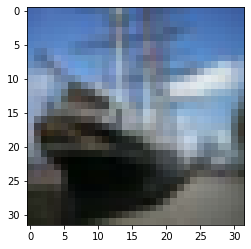

b'ship' , b'ship'


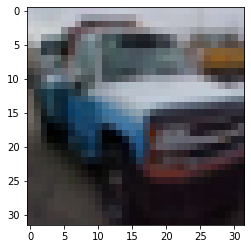

b'automobile' , b'truck'


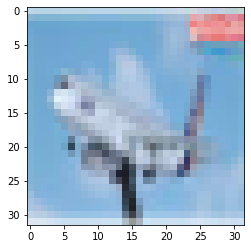

b'airplane' , b'airplane'


KeyboardInterrupt: 

In [6]:
test_visual(model,'data/cifar-10-batches-py',meta,transform_test)

In [5]:
test(model, 1, nn.CrossEntropyLoss(), test_loader)


Test set: Average loss: 0.6845, Accuracy: 7634/10000 (76%)


(tensor(0.7634), tensor(0.6845, device='cuda:0'))